# Abstract

Inspiradonme en los siguientes dataset y fuentes, quise aprovechar la bases de datos, para realizar un proyecto similar pero con Cancer.

https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system
https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook
https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data

Para eso utilice la fuente mas actual: https://www.cdc.gov/brfss/annual_data/annual_2022.html

La idea es realizar un dataset y luego poder aplicarle diferentes algoritmos,e intentar de hacer un modelo predictivo de Cancer.





# Instalación y  importacion de librerias

In [18]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install re

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [20]:
pip install zipfile

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [21]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [22]:
pip install urllib.parse

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib.parse (from versions: none)
ERROR: No matching distribution found for urllib.parse


In [23]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [28]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [32]:
pip install plotly.express

     --------------------------------------- 17.3/17.3 MB 31.2 MB/s eta 0:00:00
     ---------------------------------------- 9.8/9.8 MB 33.1 MB/s eta 0:00:00
     --------------------------------------- 44.8/44.8 MB 11.1 MB/s eta 0:00:00
     ------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
import requests
import re
import zipfile
import os
from urllib.parse import urlsplit
import numpy as np
import pandas as pd
import glob
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Creacion del Data Frame

In [35]:
# URL del archivo CSV
url = 'https://www.cdc.gov/brfss/annual_data/2022/files/LLCP2022XPT.zip'

# Realizar la solicitud GET
response = requests.get(url, allow_redirects=True)

# Intentar obtener el nombre del archivo desde el encabezado Content-Disposition
content_disposition = response.headers.get('Content-Disposition')
if content_disposition:
    filename = re.findall('filename="(.+)"', content_disposition)
    if filename:
        filename = filename[0]
    else:
        # Si no se encuentra el nombre en Content-Disposition, usar el último segmento de la URL
        filename = urlsplit(url).path.split('/')[-1]
else:
    # Si no hay encabezado Content-Disposition, usar el último segmento de la URL
    filename = urlsplit(url).path.split('/')[-1]

# Descargar y guardar el archivo
with open(filename, 'wb') as file:
    file.write(response.content)

print(f"Archivo descargado y guardado como {filename}.")

# Directorio donde se extraerán los archivos
extract_dir = 'extraido/'

# Crear el directorio si no existe
os.makedirs(extract_dir, exist_ok=True)

# Descomprimir el archivo ZIP usando el nombre obtenido automáticamente
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Archivo ZIP descomprimido en {extract_dir}.")



Archivo descargado y guardado como LLCP2022XPT.zip.
Archivo ZIP descomprimido en extraido/.


In [36]:
extract_dir = 'extraido/'  # Asegúrate de que esta ruta sea correcta

# Listar todos los archivos en el directorio
archivos = os.listdir(extract_dir)
print(f"Archivos en el directorio '{extract_dir}': {archivos}")

Archivos en el directorio 'extraido/': ['LLCP2022.XPT']


In [37]:
# Listar y limpiar nombres de archivos en el directorio
archivos = os.listdir(extract_dir)
for archivo in archivos:
    archivo_limpio = archivo.strip()  # Eliminar espacios en blanco al inicio y final
    if archivo != archivo_limpio:
        os.rename(os.path.join(extract_dir, archivo), os.path.join(extract_dir, archivo_limpio))
        print(f"Renombrado: '{archivo}' a '{archivo_limpio}'")

# Verificar que los archivos hayan sido renombrados correctamente
archivos_limpios = os.listdir(extract_dir)
print(f"Archivos en el directorio '{extract_dir}' después de limpiar: {archivos_limpios}")


Archivos en el directorio 'extraido/' después de limpiar: ['LLCP2022.XPT']


In [38]:
# Directorio donde se extrajeron los archivos
extract_dir = 'extraido/'

# Buscar archivos .XPT en el directorio extraído
xpt_files = glob.glob(os.path.join(extract_dir, '*.XPT'))

# Verificar si se encontraron archivos .XPT
if xpt_files:
    print(f"Archivos .XPT encontrados: {xpt_files}")


else:
    print("No se encontraron archivos .XPT en el directorio extraído.")




Archivos .XPT encontrados: ['extraido\\LLCP2022.XPT']


In [39]:

# Intentar leer el archivo .XPT directamente con pandas
try:
    df = pd.read_sas('extraido/LLCP2022.XPT', format='xport', encoding='latin1')  # Intenta con 'latin1'
    csv_file = 'extraido/LLCP2022.csv'
    df.to_csv(csv_file, index=False)
    print(f"Archivo 'extraido/LLCP2022.XPT' convertido a {csv_file}")
except Exception as e:
    print(f"Error al convertir 'extraido/LLCP2022.XPT' a CSV: {e}")

Archivo 'extraido/LLCP2022.XPT' convertido a extraido/LLCP2022.csv


In [40]:
# Buscar archivos .csv en el directorio extraído
csv_files = glob.glob(os.path.join(extract_dir, '*.csv'))

if csv_files:
    print(f"Archivos .CSV encontrados: {csv_files}")

    # Tomar el primer archivo CSV encontrado
    csv_file = csv_files[0]

    # Leer el archivo CSV con pandas
    df = pd.read_csv(csv_file)

    # Mostrar las primeras filas del DataFrame
    print(f"Archivo CSV encontrado: {csv_file}")
    print("Contenido del archivo CSV:")
    print(df.head())
else:
    print("No se encontraron archivos CSV en el directorio extraído.")

Archivos .CSV encontrados: ['extraido\\LLCP2022.csv']
Archivo CSV encontrado: extraido\LLCP2022.csv
Contenido del archivo CSV:
   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN

# Selección y limpieza de datos

In [41]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,2032022,2,3,2022,1100.0,2022000001,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,2042022,2,4,2022,1100.0,2022000002,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,2022022,2,2,2022,1100.0,2022000003,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,2032022,2,3,2022,1100.0,2022000004,2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,2022022,2,2,2022,1100.0,2022000005,2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,11.0,12192022,12,19,2022,1100.0,2022001527,2.022002e+09,NaN,...,4.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,1.0
445128,78.0,11.0,12212022,12,21,2022,1100.0,2022001528,2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0
445129,78.0,11.0,11292022,11,29,2022,1100.0,2022001529,2.022002e+09,NaN,...,1.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,2.0,2.0,2.0
445130,78.0,11.0,12082022,12,8,2022,1100.0,2022001530,2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0


La Tabla es demaciado grande (445132 rows × 328 columns). Ademas de que mucha informacion no es relevante para el proyecto. Para limpieza y seleccion de los mismos se utiliza el Codebook respectivo a la base de datos original. Y debido a su gran tamaño realice un segundo notebook para analizarlo por separado:
https://colab.research.google.com/drive/1k_iYvFPBALUv31XEwnT6MCnU3Kjwc0op#scrollTo=UJBc4YDu7us3

En este segundo notebook se explica la seleción de las diferentes columnas.

In [42]:
# Lista de columnas que quieres filtrar
columnas_para_filtrar = [
    'SMOKE100', '_BMI5', '_RFDRHV8',  '_TOTINDA', '_AGEG5YR', 'TRNSGNDR',
    'CHCSCNC1', 'CHCOCNC1', 'HADHYST2', 'CNCRDIFF', 'CNCRAGE', 'CNCRTYP2',  '_SEX', '_PHYS14D', '_MENT14D'
]
# Filtra el DataFrame para incluir solo las columnas especificadas
df_filtrado = df[columnas_para_filtrar]

print("DataFrame filtrado:")
df_filtrado

DataFrame filtrado:


,SMOKE100,_BMI5,_RFDRHV8,_TOTINDA,_AGEG5YR,TRNSGNDR,CHCSCNC1,CHCOCNC1,HADHYST2,CNCRDIFF,CNCRAGE,CNCRTYP2,_SEX,_PHYS14D,_MENT14D
0,2.0,NaN,1.0,2.0,13.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,1.0,1.0
1,2.0,2657.0,1.0,2.0,13.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,2.0,1.0,1.0
2,2.0,2561.0,1.0,1.0,8.0,NaN,1.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0,2.0
3,1.0,2330.0,1.0,1.0,14.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,1.0,1.0
4,2.0,2177.0,1.0,1.0,5.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,2.0,2563.0,9.0,1.0,1.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,1.0,2.0
445128,2.0,2866.0,1.0,1.0,7.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,2.0,2.0
445129,1.0,1723.0,9.0,2.0,10.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,2.0,3.0,3.0
445130,2.0,3255.0,1.0,2.0,11.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0


Una vez  seleccionadas las columnas relevantes, paso a trabajar y preparar las mismas. En base al Codebook

In [81]:
df_filtrado.isna().sum()

SMOKE100>Fuma?                                    0
IMC                                               0
_RFDRHV8>Toma_mucho_Alcohol?                      0
_TOTINDA>Acitividad_Fisica?                       0
_AGEG5YR>Edad?                                    0
TRNSGNDR>TRANS?                                   0
CHCSCNC1>Cancer de piel diferente a melanoma?     0
CHCOCNC1>Melanoma u otro cancer?                  0
HADHYST2>histerectomía?                           0
CNCRDIFF>Cuantos_tipos_de_cancer_tuvo?            0
CNCRAGE>Con_Cuantos_años_se_entero_del_cancer?    0
CNCRTYP2>Que_tipo_de_cancer?                      0
_SEX                                              0
_PHYS14D>Estado_físico_no_bueno_ultimo_tiempo     0
_MENT14D>Estado_mental_no_bueno_ultimo_tiempo?    0
Fuma?                                             0
Toma_mucho_Alcohol?                               0
Acitividad_Fisica?                                0
Edad                                              0
TRANS?      

In [80]:
#Los vacios de si fuma los lleno con No sabe(7) por no saber el resultado
df_filtrado['SMOKE100'] = df_filtrado['SMOKE100'].fillna(7)
df_filtrado['Fuma?'] = df_filtrado['SMOKE100'].map({
    1: 'Si',
    2: 'No',
    7: 'No sabe',
    9: 'Se Rehusa a responder'
}).fillna('Faltante')
df_filtrado = df_filtrado.rename(columns={'SMOKE100': 'SMOKE100>Fuma?'})

KeyError: 'SMOKE100'

In [78]:
df_filtrado = df_filtrado.dropna(subset=['_BMI5'])
df_filtrado.loc[:, '_BMI5'] = df_filtrado['_BMI5'].astype(int)
df_filtrado = df_filtrado.rename(columns={'_BMI5': 'IMC'})

KeyError: ['_BMI5']

In [46]:
df_filtrado['Toma_mucho_Alcohol?'] = df_filtrado['_RFDRHV8'].map({
    1: 'No',
    2: 'Si',
    9: 'No se sabe'
}).fillna('Faltante')
df_filtrado = df_filtrado.rename(columns={'_RFDRHV8': '_RFDRHV8>Toma_mucho_Alcohol?'})

In [47]:
df_filtrado['Acitividad_Fisica?'] = df_filtrado['_TOTINDA'].map({
    1: 'Si',
    2: 'No',
    9: 'No se sabe'
}).fillna('Faltante')
df_filtrado = df_filtrado.rename(columns={'_TOTINDA': '_TOTINDA>Acitividad_Fisica?'})

In [48]:
df_filtrado['Edad'] = df_filtrado['_AGEG5YR'].map({
    1: 'De 18 a 24',
    2: 'De 25 a 29',
    3: 'De 30 a 34',
    4: 'De 35 a 39',
    5: 'De 40 a 44',
    6: 'De 45 a 49',
    7: 'De 50 a 54',
    8: 'De 55 a 59',
    9: 'De 60 a 64',
    10: 'De 65 a 69',
    11: 'De 70 a 74',
    12: 'De 75 a 79',
    13: 'De 80 o más'
}).fillna('Desconocido')
df_filtrado = df_filtrado.rename(columns={'_AGEG5YR': '_AGEG5YR>Edad?'})

In [49]:
#Teniendo en cuenta que la poblacion Trans es menor al 1%, se asume que los datos vacios son No(4)
df_filtrado['TRNSGNDR'] = df_filtrado['TRNSGNDR'].fillna('4')
df_filtrado['TRANS?'] = df_filtrado['TRNSGNDR'].map({
    1: 'Sí, Transgénero, masculino a femenino',
    2: 'Sí, Transgénero, femenino a masculino',
    3: 'Sí, Transgénero, no conforme con el género',
    4: 'No',
    7: 'No sabe/No está seguro',
    9: 'Se rehúsa a responder',
}).fillna('No')
df_filtrado = df_filtrado.rename(columns={'TRNSGNDR': 'TRNSGNDR>TRANS?'})

In [50]:
df_filtrado['Cancer de piel diferente a melanoma'] = df_filtrado['CHCSCNC1'].map({
    1: 'Sí',
    2: 'No',
    7: 'No sabe / No está seguro',
    9: 'Se rehúsa a responder',
    'BLANK': 'No preguntado o Faltante'
}).fillna('No preguntado o Faltante')
df_filtrado = df_filtrado.rename(columns={'CHCSCNC1': 'CHCSCNC1>Cancer de piel diferente a melanoma?'})

In [51]:
df_filtrado['CHCOCNC1'] = df_filtrado['CHCOCNC1'].fillna(2)
df_filtrado['Melanoma u otro cancer'] = df_filtrado['CHCOCNC1'].map({
    1: 'Sí',
    2: 'No',
    7: 'No sabe / No está seguro',
    9: 'Se rehúsa a responder',
    'BLANK': 'No preguntado o Faltante'
}).fillna('No preguntado o Faltante')
df_filtrado = df_filtrado.rename(columns={'CHCOCNC1': 'CHCOCNC1>Melanoma u otro cancer?'})

In [52]:
#Un hombre no puede tener una histerectomía, por lo que deberia ser un No(2) directo

df_filtrado['HADHYST2'] = np.where(
    (df_filtrado['_SEX'] == 1) & (df_filtrado['HADHYST2'].isna()),
    2,
    df_filtrado['HADHYST2']
)

# Luego, llenar los vacíos restantes con 7 ya que no se sabe
df_filtrado['HADHYST2'] = df_filtrado['HADHYST2'].fillna(7)


In [53]:
df_filtrado['histerectomía?'] = df_filtrado['HADHYST2'].map({
    1: 'Sí',
    2: 'No',
    7: 'No sabe/No está seguro',
    9: 'Se rehúsa a responder',
    'BLANK': 'No'
}).fillna('No')
df_filtrado = df_filtrado.rename(columns={'HADHYST2': 'HADHYST2>histerectomía?'})

In [54]:
#No esta aclaro los que no tuvo, por lo que vacios se contemplan como que no tuvo(0)
df_filtrado['CNCRDIFF'] = df_filtrado['CNCRDIFF'].fillna(0)
df_filtrado['Cuantos_tipos_de_cancer_tuvo?'] = df_filtrado['CNCRDIFF'].map({
    1: 'Solo uno',
    2: 'Dos',
    3: 'Tres o más',
    7: 'No sabe',
    9: 'Se rehúsa a responder',
    0: 'No tuvo'
}).fillna('No tuvo')
df_filtrado = df_filtrado.rename(columns={'CNCRDIFF': 'CNCRDIFF>Cuantos_tipos_de_cancer_tuvo?'})

In [55]:
# CNCRAGE corresponde a la edad cuando se enteraron que tenian cancer se utiliza 200 para indicar que no tuvo
df_filtrado['CNCRAGE'] = df_filtrado['CNCRAGE'].fillna(200)
df_filtrado['CNCRAGE'] = df_filtrado['CNCRAGE'].astype(int)
df_filtrado = df_filtrado.rename(columns={'CNCRAGE': 'CNCRAGE>Con_Cuantos_años_se_entero_del_cancer?'})

In [56]:
#Igual que en los anteriores se llenan los vacios para indicar que no tuvieron cancer
df_filtrado['CNCRTYP2'] = df_filtrado['CNCRTYP2'].fillna(0)
df_filtrado['Que_tipo_de_cancer?'] = df_filtrado['CNCRTYP2'].map({
    0: 'Ninguno',
    1: 'Vejiga',
    2: 'Sangre',
    3: 'Hueso',
    4: 'Cerebro',
    5: 'Mama',
    6: 'Cérvix/Cervical',
    7: 'Colon',
    8: 'Esófago/Esófagico',
    9: 'Vesícula biliar',
    10: 'Riñón',
    11: 'Laringe-tráquea',
    12: 'Leucemia',
    13: 'Hígado',
    14: 'Pulmón',
    15: 'Linfoma',
    16: 'Melanoma',
    17: 'Boca/lengua/labio',
    18: 'Ovario/Ovárico',
    19: 'Páncreas/Pancreático',
    20: 'Próstata',
    21: 'Recto/Rectal',
    22: 'Piel (no melanoma)',
    23: 'Piel (no se sabe qué tipo)',
    24: 'Tejido blando (músculo o grasa)',
    25: 'Estómago',
    26: 'Testículo/Testicular',
    27: 'Garganta - faringe',
    28: 'Tiroides',
    29: 'Útero/Uterino',
    30: 'Otro',
    77: 'No sabe/No está seguro',
    99: 'Se rehúsa a responder',
    'BLANK': 'No preguntado o Faltante'
}).fillna('No preguntado o Faltante')
df_filtrado = df_filtrado.rename(columns={'CNCRTYP2': 'CNCRTYP2>Que_tipo_de_cancer?'})

In [57]:
df_filtrado['Sexo'] = df_filtrado['_SEX'].map({
    1: 'Masculino',
    2: 'Femenino'
}).fillna('No especificado')


In [58]:
df_filtrado['Estado_físico_no_bueno_ultimo_tiempo'] = df_filtrado['_PHYS14D'].map({
    1: 'Cero días con salud física no buena',
    2: '1-13 días con salud física no buena',
    3: '14+ días con salud física no buena',
    9: 'No sabe/Se rehúsa/Faltante'
}).fillna('No especificado')
df_filtrado = df_filtrado.rename(columns={'_PHYS14D': '_PHYS14D>Estado_físico_no_bueno_ultimo_tiempo'})

In [59]:
df_filtrado['Estado_mental_no_bueno_ultimo_tiempo'] = df_filtrado['_MENT14D'].map({
    1: 'Cero días con salud mental no buena',
    2: '1-13 días con salud mental no buena',
    3: '14+ días con salud mental no buena',
    9: 'No sabe/Se rehúsa/Faltante'
}).fillna('No especificado')
df_filtrado = df_filtrado.rename(columns={'_MENT14D': '_MENT14D>Estado_mental_no_bueno_ultimo_tiempo?'})

In [60]:
df_filtrado.isna().sum()

SMOKE100>Fuma?                                    0
IMC                                               0
_RFDRHV8>Toma_mucho_Alcohol?                      0
_TOTINDA>Acitividad_Fisica?                       0
_AGEG5YR>Edad?                                    0
TRNSGNDR>TRANS?                                   0
CHCSCNC1>Cancer de piel diferente a melanoma?     0
CHCOCNC1>Melanoma u otro cancer?                  0
HADHYST2>histerectomía?                           0
CNCRDIFF>Cuantos_tipos_de_cancer_tuvo?            0
CNCRAGE>Con_Cuantos_años_se_entero_del_cancer?    0
CNCRTYP2>Que_tipo_de_cancer?                      0
_SEX                                              0
_PHYS14D>Estado_físico_no_bueno_ultimo_tiempo     0
_MENT14D>Estado_mental_no_bueno_ultimo_tiempo?    0
Fuma?                                             0
Toma_mucho_Alcohol?                               0
Acitividad_Fisica?                                0
Edad                                              0
TRANS?      

In [61]:
df_filtrado

,SMOKE100>Fuma?,IMC,_RFDRHV8>Toma_mucho_Alcohol?,_TOTINDA>Acitividad_Fisica?,_AGEG5YR>Edad?,TRNSGNDR>TRANS?,CHCSCNC1>Cancer de piel diferente a melanoma?,CHCOCNC1>Melanoma u otro cancer?,HADHYST2>histerectomía?,CNCRDIFF>Cuantos_tipos_de_cancer_tuvo?,...,Edad,TRANS?,Cancer de piel diferente a melanoma,Melanoma u otro cancer,histerectomía?,Cuantos_tipos_de_cancer_tuvo?,Que_tipo_de_cancer?,Sexo,Estado_físico_no_bueno_ultimo_tiempo,Estado_mental_no_bueno_ultimo_tiempo
1,2.0,2657.0,1.0,2.0,13.0,4,1.0,1.0,1.0,0.0,...,De 80 o más,No,Sí,Sí,Sí,No tuvo,Ninguno,Femenino,Cero días con salud física no buena,Cero días con salud mental no buena
2,2.0,2561.0,1.0,1.0,8.0,4,1.0,2.0,1.0,0.0,...,De 55 a 59,No,Sí,No,Sí,No tuvo,Ninguno,Femenino,1-13 días con salud física no buena,1-13 días con salud mental no buena
3,1.0,2330.0,1.0,1.0,14.0,4,2.0,2.0,2.0,0.0,...,Desconocido,No,No,No,No,No tuvo,Ninguno,Femenino,Cero días con salud física no buena,Cero días con salud mental no buena
4,2.0,2177.0,1.0,1.0,5.0,4,2.0,2.0,1.0,0.0,...,De 40 a 44,No,No,No,Sí,No tuvo,Ninguno,Femenino,1-13 días con salud física no buena,Cero días con salud mental no buena
5,2.0,2608.0,1.0,2.0,13.0,4,2.0,2.0,2.0,0.0,...,De 80 o más,No,No,No,No,No tuvo,Ninguno,Masculino,1-13 días con salud física no buena,Cero días con salud mental no buena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,2.0,2563.0,9.0,1.0,1.0,4,2.0,2.0,2.0,0.0,...,De 18 a 24,No,No,No,No,No tuvo,Ninguno,Femenino,Cero días con salud física no buena,1-13 días con salud mental no buena
445128,2.0,2866.0,1.0,1.0,7.0,4,2.0,2.0,2.0,0.0,...,De 50 a 54,No,No,No,No,No tuvo,Ninguno,Femenino,1-13 días con salud física no buena,1-13 días con salud mental no buena
445129,1.0,1723.0,9.0,2.0,10.0,4,2.0,2.0,2.0,0.0,...,De 65 a 69,No,No,No,No,No tuvo,Ninguno,Femenino,14+ días con salud física no buena,14+ días con salud mental no buena
445130,2.0,3255.0,1.0,2.0,11.0,4,2.0,2.0,2.0,0.0,...,De 70 a 74,No,No,No,No,No tuvo,Ninguno,Masculino,Cero días con salud física no buena,Cero días con salud mental no buena


In [62]:

df_filtrado2 = df_filtrado[['Sexo','_AGEG5YR>Edad?','IMC', 'Fuma?',
       'Toma_mucho_Alcohol?', 'Acitividad_Fisica?', 'Edad', 'TRANS?',
       'Cancer de piel diferente a melanoma', 'Melanoma u otro cancer',
       'histerectomía?', 'Cuantos_tipos_de_cancer_tuvo?',
       'Que_tipo_de_cancer?',  'Estado_físico_no_bueno_ultimo_tiempo',
       'Estado_mental_no_bueno_ultimo_tiempo']]
df_filtrado2.loc[:, 'Tuvo_Cancer?'] = df_filtrado2['Que_tipo_de_cancer?'].apply(
    lambda x: 'No' if x in ['Ninguno', 'No sabe/No está seguro'] else 'Sí'
)


df_filtrado2

C:\Users\MATIAS\AppData\Local\Temp\ipykernel_16896\843415966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado2.loc[:, 'Tuvo_Cancer?'] = df_filtrado2['Que_tipo_de_cancer?'].apply(


,Sexo,_AGEG5YR>Edad?,IMC,Fuma?,Toma_mucho_Alcohol?,Acitividad_Fisica?,Edad,TRANS?,Cancer de piel diferente a melanoma,Melanoma u otro cancer,histerectomía?,Cuantos_tipos_de_cancer_tuvo?,Que_tipo_de_cancer?,Estado_físico_no_bueno_ultimo_tiempo,Estado_mental_no_bueno_ultimo_tiempo,Tuvo_Cancer?
1,Femenino,13.0,2657.0,No,No,No,De 80 o más,No,Sí,Sí,Sí,No tuvo,Ninguno,Cero días con salud física no buena,Cero días con salud mental no buena,No
2,Femenino,8.0,2561.0,No,No,Si,De 55 a 59,No,Sí,No,Sí,No tuvo,Ninguno,1-13 días con salud física no buena,1-13 días con salud mental no buena,No
3,Femenino,14.0,2330.0,Si,No,Si,Desconocido,No,No,No,No,No tuvo,Ninguno,Cero días con salud física no buena,Cero días con salud mental no buena,No
4,Femenino,5.0,2177.0,No,No,Si,De 40 a 44,No,No,No,Sí,No tuvo,Ninguno,1-13 días con salud física no buena,Cero días con salud mental no buena,No
5,Masculino,13.0,2608.0,No,No,No,De 80 o más,No,No,No,No,No tuvo,Ninguno,1-13 días con salud física no buena,Cero días con salud mental no buena,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Femenino,1.0,2563.0,No,No se sabe,Si,De 18 a 24,No,No,No,No,No tuvo,Ninguno,Cero días con salud física no buena,1-13 días con salud mental no buena,No
445128,Femenino,7.0,2866.0,No,No,Si,De 50 a 54,No,No,No,No,No tuvo,Ninguno,1-13 días con salud física no buena,1-13 días con salud mental no buena,No
445129,Femenino,10.0,1723.0,Si,No se sabe,No,De 65 a 69,No,No,No,No,No tuvo,Ninguno,14+ días con salud física no buena,14+ días con salud mental no buena,No
445130,Masculino,11.0,3255.0,No,No,No,De 70 a 74,No,No,No,No,No tuvo,Ninguno,Cero días con salud física no buena,Cero días con salud mental no buena,No


In [63]:
df_analisis = df_filtrado2[['Tuvo_Cancer?','Sexo','IMC', 'Fuma?',
       'Toma_mucho_Alcohol?', 'Acitividad_Fisica?', 'Edad', 'TRANS?']]
df_analisis

,Tuvo_Cancer?,Sexo,IMC,Fuma?,Toma_mucho_Alcohol?,Acitividad_Fisica?,Edad,TRANS?
1,No,Femenino,2657.0,No,No,No,De 80 o más,No
2,No,Femenino,2561.0,No,No,Si,De 55 a 59,No
3,No,Femenino,2330.0,Si,No,Si,Desconocido,No
4,No,Femenino,2177.0,No,No,Si,De 40 a 44,No
5,No,Masculino,2608.0,No,No,No,De 80 o más,No
...,...,...,...,...,...,...,...,...
445127,No,Femenino,2563.0,No,No se sabe,Si,De 18 a 24,No
445128,No,Femenino,2866.0,No,No,Si,De 50 a 54,No
445129,No,Femenino,1723.0,Si,No se sabe,No,De 65 a 69,No
445130,No,Masculino,3255.0,No,No,No,De 70 a 74,No


# Analisis

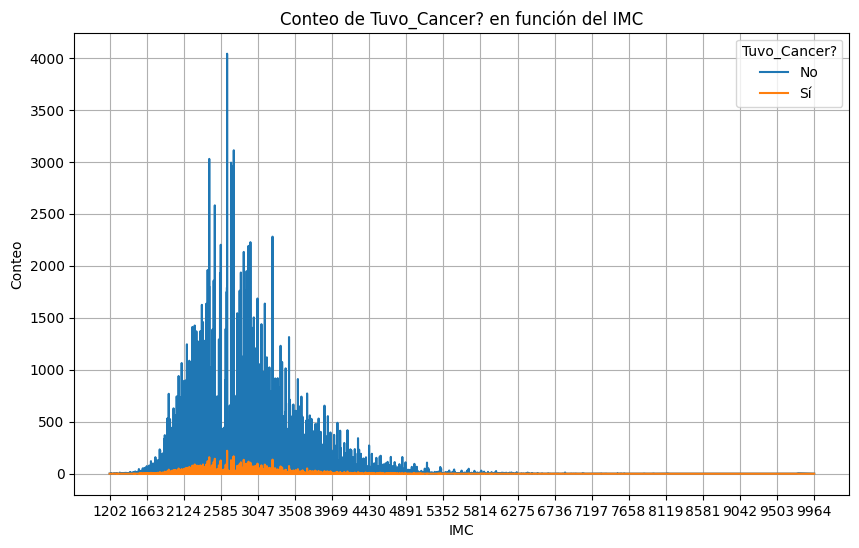

In [64]:
# Agrupar por 'IMC' y 'Tuvo_Cancer?', y contar las ocurrencias
df_grouped = df_analisis.groupby(['IMC', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
df_grouped.plot(kind='line', ax=plt.gca())

# Personalizar el eje x para tener 10 ticks
num_ticks = 20
plt.xticks(ticks=np.linspace(df_analisis['IMC'].min(), df_analisis['IMC'].max(), num_ticks))

plt.title('Conteo de Tuvo_Cancer? en función del IMC')
plt.xlabel('IMC')
plt.ylabel('Conteo')
plt.grid(True)
plt.show()

In [65]:
# Filtrar el DataFrame para 'Tuvo_Cancer?'
imc_cancer_si = df_analisis[df_analisis['Tuvo_Cancer?'] == 'Sí']['IMC']
imc_cancer_no = df_analisis[df_analisis['Tuvo_Cancer?'] == 'No']['IMC']

# Calcular moda, media y mediana para 'Sí'
moda_imc_si = imc_cancer_si.mode()[0]
media_imc_si = imc_cancer_si.mean()
mediana_imc_si = imc_cancer_si.median()

# Calcular moda, media y mediana para 'No'
moda_imc_no = imc_cancer_no.mode()[0]
media_imc_no = imc_cancer_no.mean()
mediana_imc_no = imc_cancer_no.median()

# Mostrar los resultados
print("Resultados para 'Tuvo_Cancer? = Sí'")
print(f"Moda del IMC: {moda_imc_si}")
print(f"Media del IMC: {media_imc_si}")
print(f"Mediana del IMC: {mediana_imc_si}")

print("\nResultados para 'Tuvo_Cancer? = No'")
print(f"Moda del IMC: {moda_imc_no}")
print(f"Media del IMC: {media_imc_no}")
print(f"Mediana del IMC: {mediana_imc_no}")

Resultados para 'Tuvo_Cancer? = Sí'
Moda del IMC: 2663.0
Media del IMC: 2806.0647541381486
Mediana del IMC: 2722.0

Resultados para 'Tuvo_Cancer? = No'
Moda del IMC: 2663.0
Media del IMC: 2855.556774236476
Mediana del IMC: 2744.0


El Índice de masa corporal no parece afectar en principio la aparición de cancer. Podemos verlo a nivel individual de cada tipo, pero no todos los tipos de cancer tienen una cantidad relevante por lo que se filtrara en base a la ocurrencia en la base de datos:


In [66]:
conteo_cancer = df_filtrado2['Que_tipo_de_cancer?'].value_counts()
print(conteo_cancer)

Que_tipo_de_cancer?
Ninguno                            374966
Piel (no melanoma)                   5961
Mama                                 2689
Melanoma                             2573
Próstata                             1802
Piel (no se sabe qué tipo)           1418
Otro                                 1254
No sabe/No está seguro                759
Colon                                 665
Cérvix/Cervical                       511
Linfoma                               433
Pulmón                                428
Tiroides                              391
Vejiga                                367
Útero/Uterino                         352
Riñón                                 298
Leucemia                              245
Ovario/Ovárico                        195
Se rehúsa a responder                 127
Sangre                                 99
Garganta - faringe                     93
Testículo/Testicular                   88
Páncreas/Pancreático                   85
Recto/Rectal  

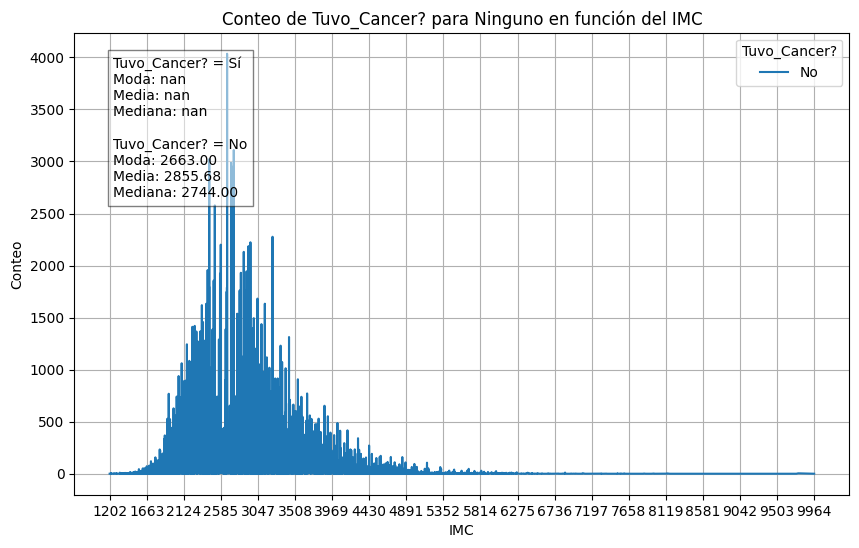

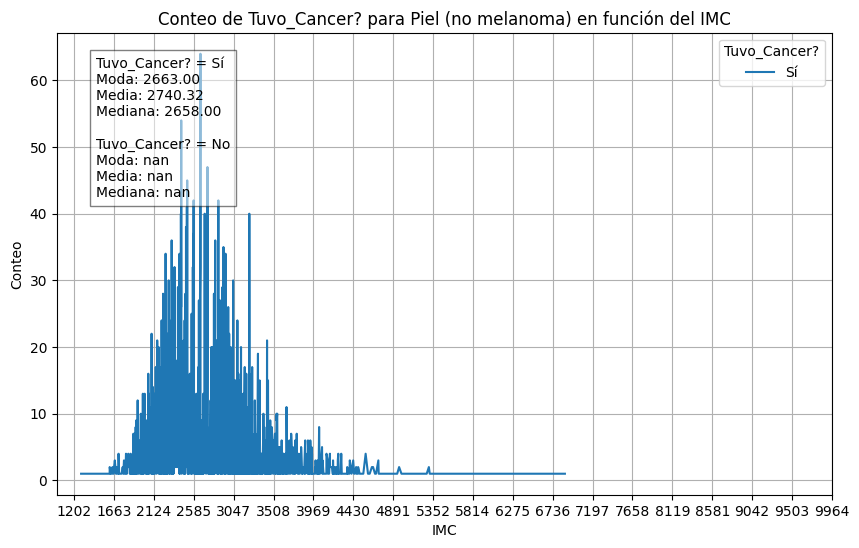

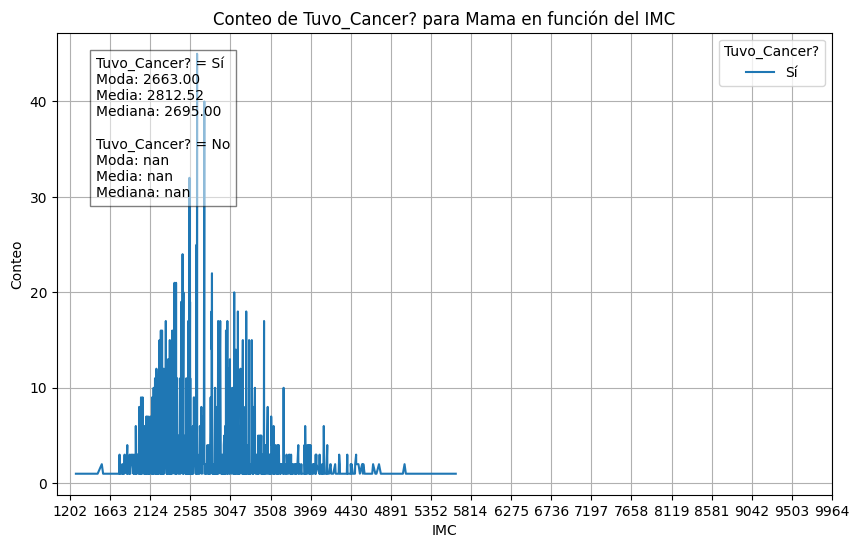

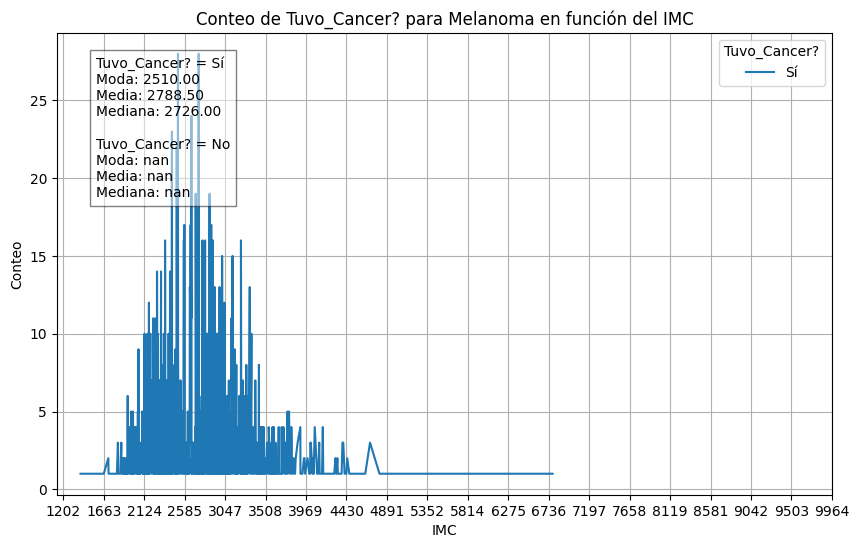

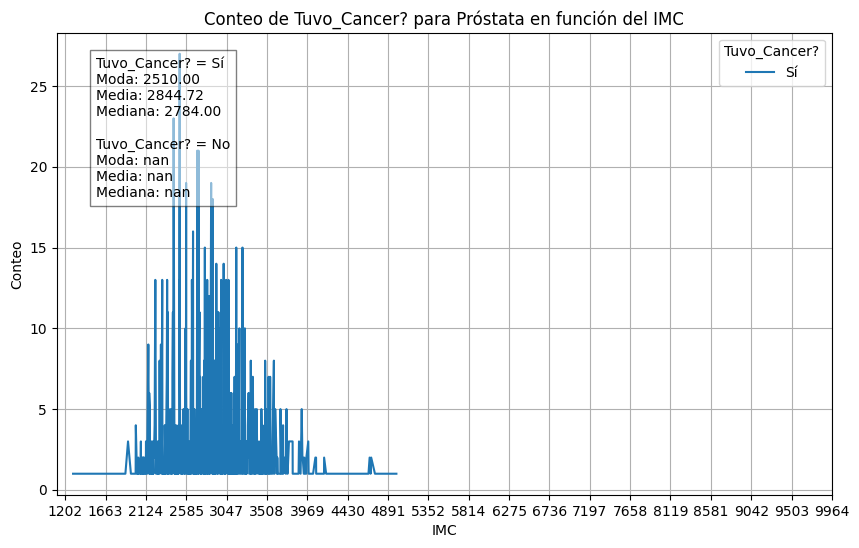

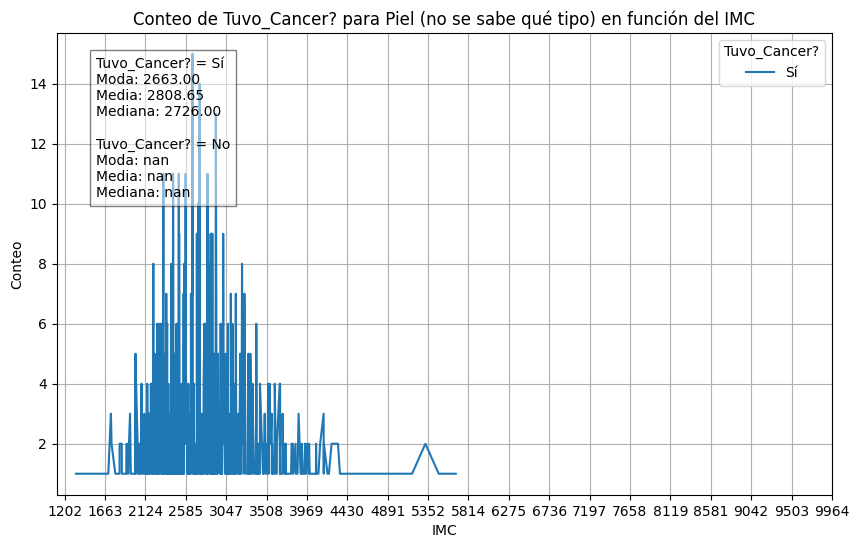

In [67]:
# Lista de tipos de cáncer que quieres filtrar
tipos_de_cancer_filtrados = ['Ninguno', 'Piel (no melanoma)', 'Mama', 'Melanoma', 'Próstata', 'Piel (no se sabe qué tipo)']

# Iterar sobre cada valor único en la columna 'Que_tipo_de_cancer?'
for cancer_type in tipos_de_cancer_filtrados:
    # Filtrar el DataFrame para el tipo de cáncer actual
    df_cancer_type = df_filtrado2[df_filtrado2['Que_tipo_de_cancer?'] == cancer_type]

    # Agrupar por 'IMC' y 'Tuvo_Cancer?', y contar las ocurrencias
    df_grouped = df_cancer_type.groupby(['IMC', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

    # Calcular moda, media y mediana para 'Sí'
    imc_cancer_si = df_cancer_type[df_cancer_type['Tuvo_Cancer?'] == 'Sí']['IMC']
    moda_imc_si = imc_cancer_si.mode()[0] if not imc_cancer_si.empty else np.nan
    media_imc_si = imc_cancer_si.mean() if not imc_cancer_si.empty else np.nan
    mediana_imc_si = imc_cancer_si.median() if not imc_cancer_si.empty else np.nan

    # Calcular moda, media y mediana para 'No'
    imc_cancer_no = df_cancer_type[df_cancer_type['Tuvo_Cancer?'] == 'No']['IMC']
    moda_imc_no = imc_cancer_no.mode()[0] if not imc_cancer_no.empty else np.nan
    media_imc_no = imc_cancer_no.mean() if not imc_cancer_no.empty else np.nan
    mediana_imc_no = imc_cancer_no.median() if not imc_cancer_no.empty else np.nan

    # Crear el gráfico de líneas
    plt.figure(figsize=(10, 6))
    df_grouped.plot(kind='line', ax=plt.gca())

    # Personalizar el eje x para tener 20 ticks
    num_ticks = 20
    plt.xticks(ticks=np.linspace(df_analisis['IMC'].min(), df_analisis['IMC'].max(), num_ticks))

    # Añadir moda, media y mediana en el gráfico
    textstr = f"Tuvo_Cancer? = Sí\nModa: {moda_imc_si:.2f}\nMedia: {media_imc_si:.2f}\nMediana: {mediana_imc_si:.2f}"
    textstr += f"\n\nTuvo_Cancer? = No\nModa: {moda_imc_no:.2f}\nMedia: {media_imc_no:.2f}\nMediana: {mediana_imc_no:.2f}"

    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.title(f'Conteo de Tuvo_Cancer? para {cancer_type} en función del IMC')
    plt.xlabel('IMC')
    plt.ylabel('Conteo')
    plt.grid(True)
    plt.show()


No parece que el IMC tenga incidencia en los casos de cancer, por lo menos en los tipos de cancer vistos, podria analisarse otros pero seria necesario una mayor cantidad de casos positivos en la muestra.

<Figure size 1200x800 with 0 Axes>

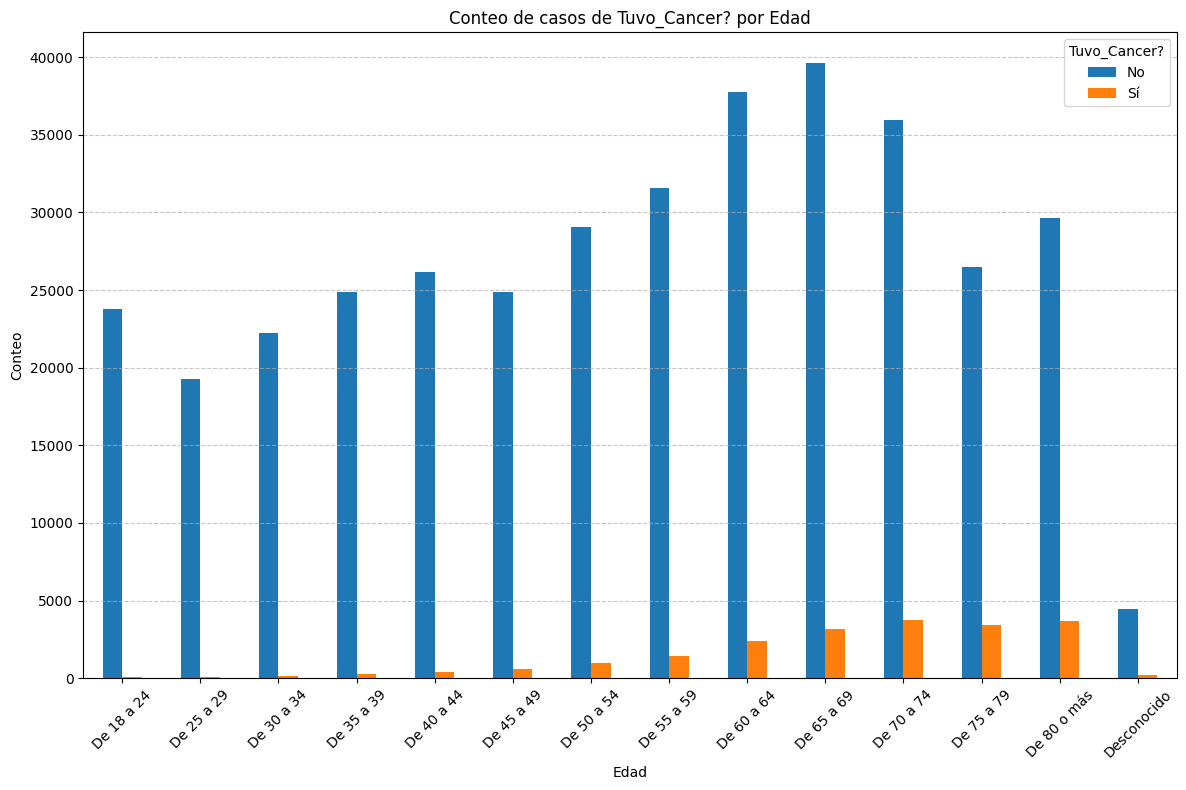

In [68]:
# Agrupar por 'Edad' y 'Tuvo_Cancer?', y contar las ocurrencias
df_grouped = df_analisis.groupby(['Edad', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

# Crear un gráfico de barras usando seaborn
plt.figure(figsize=(12, 8))
df_grouped.plot(kind='bar', figsize=(12, 8))

# Personalizar el gráfico
plt.title('Conteo de casos de Tuvo_Cancer? por Edad')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tuvo_Cancer?')
plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien

plt.show()

En este caso es evidente que la aparición de Cancer aumenta con la edad.

<Figure size 1200x800 with 0 Axes>

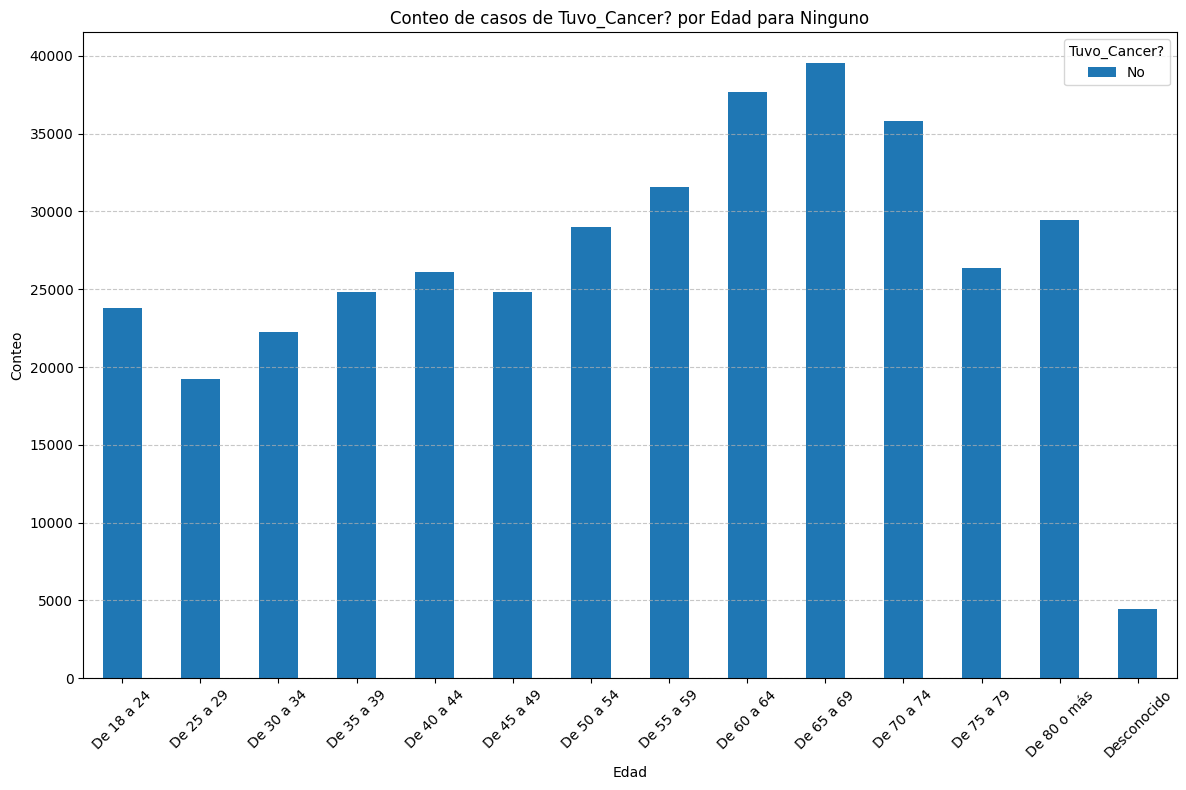

<Figure size 1200x800 with 0 Axes>

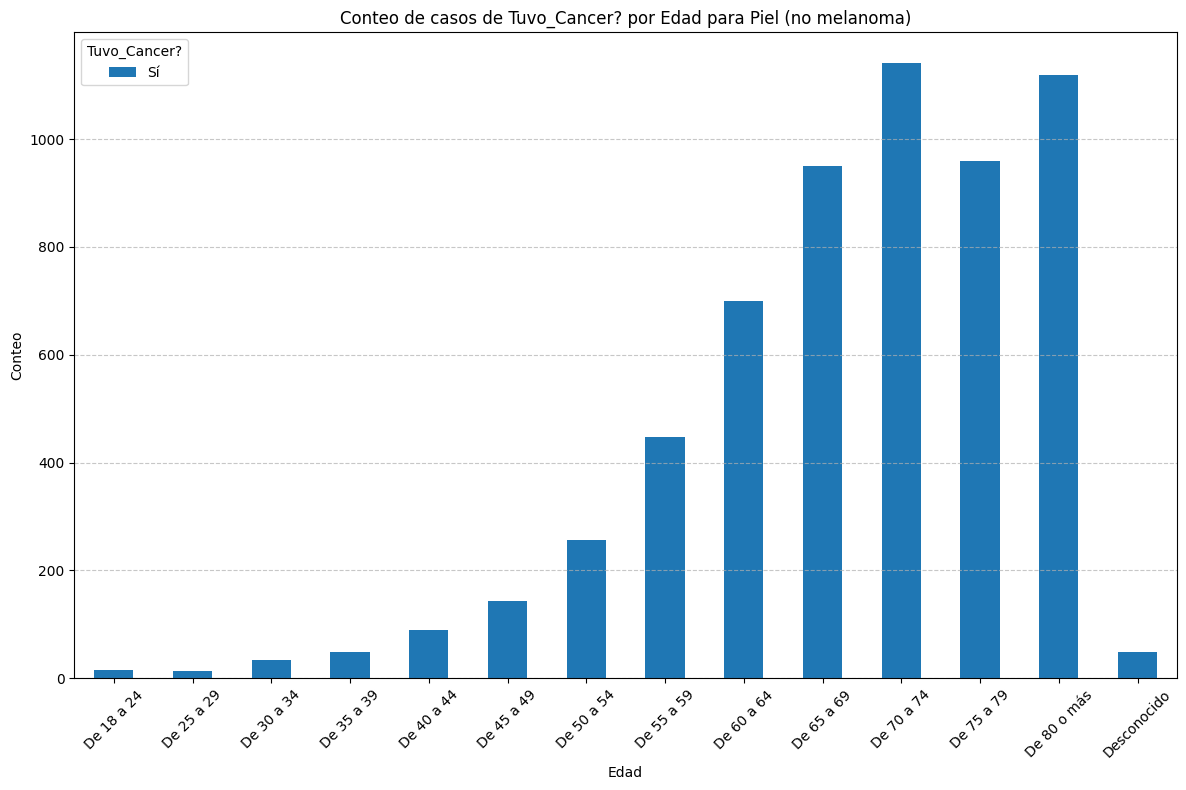

<Figure size 1200x800 with 0 Axes>

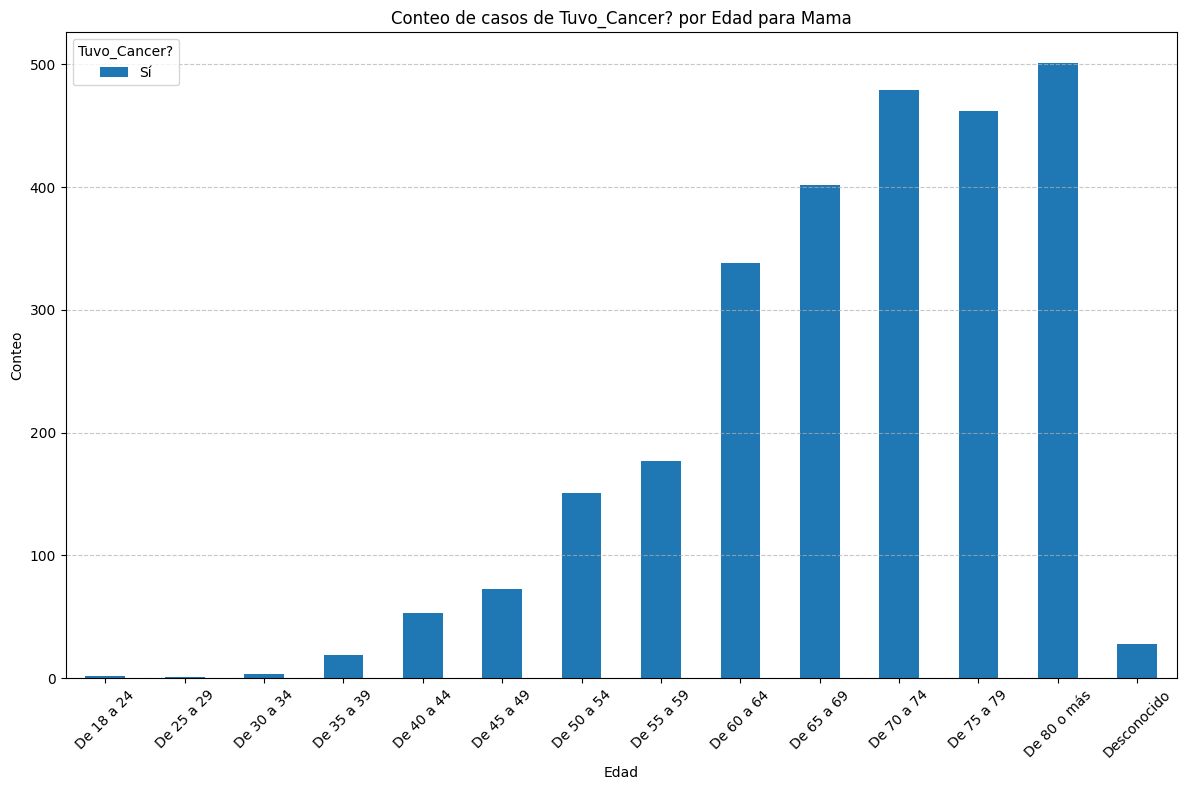

<Figure size 1200x800 with 0 Axes>

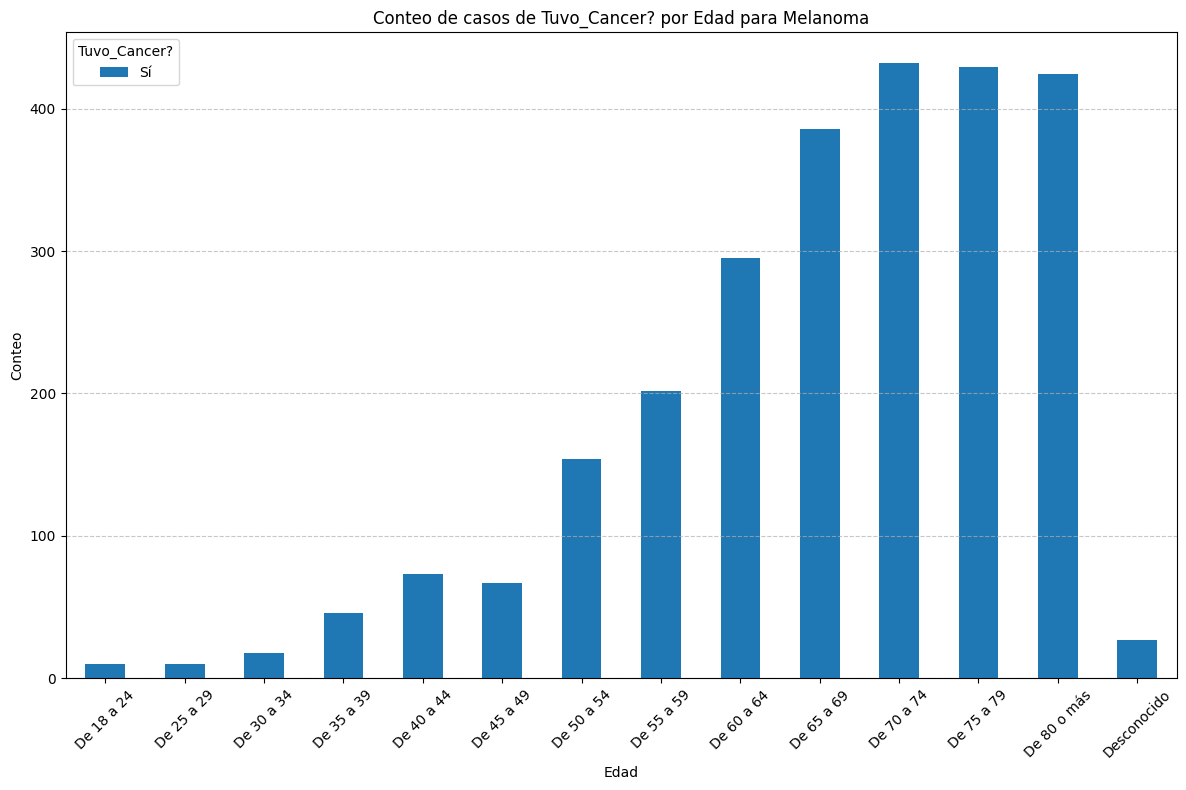

<Figure size 1200x800 with 0 Axes>

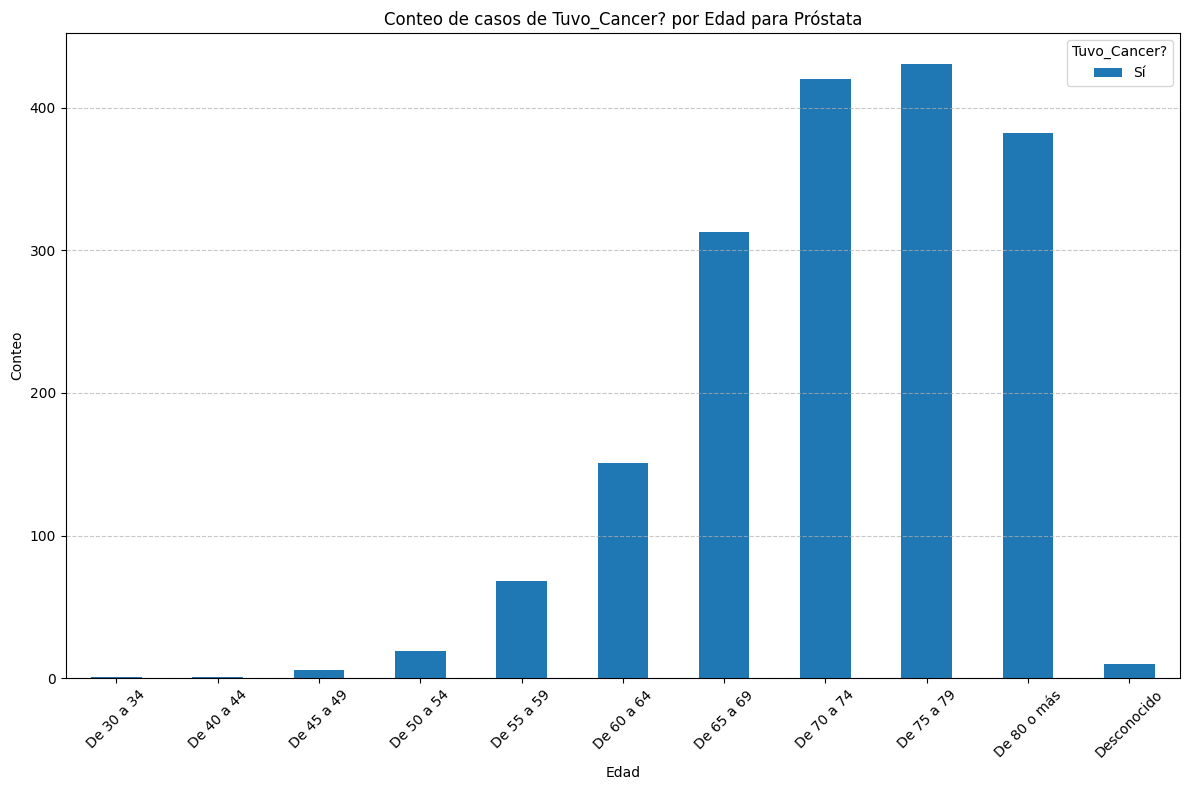

<Figure size 1200x800 with 0 Axes>

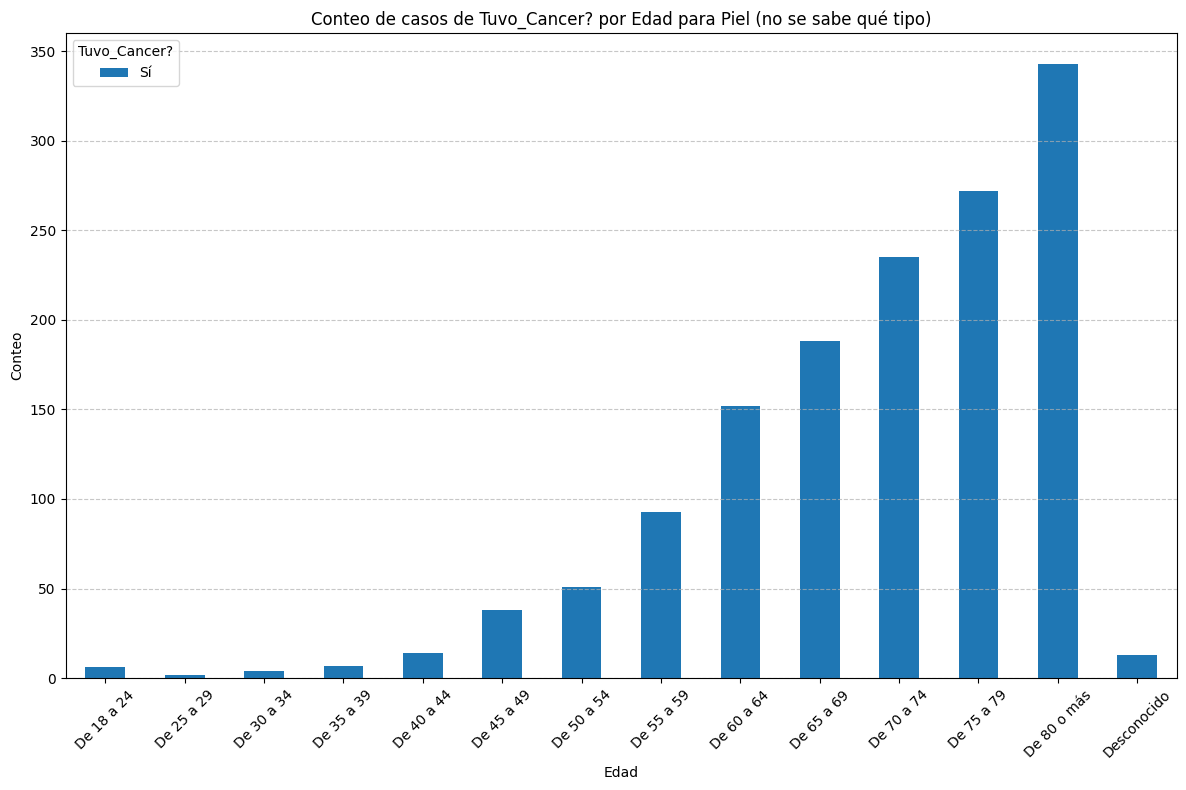

In [69]:
# Lista de tipos de cáncer que quieres filtrar
tipos_de_cancer_filtrados = ['Ninguno', 'Piel (no melanoma)', 'Mama', 'Melanoma', 'Próstata', 'Piel (no se sabe qué tipo)']

# Iterar sobre cada valor único en la lista de tipos de cáncer filtrados
for cancer_type in tipos_de_cancer_filtrados:
    # Filtrar el DataFrame para el tipo de cáncer actual
    df_cancer_type = df_filtrado2[df_filtrado2['Que_tipo_de_cancer?'] == cancer_type]

    # Agrupar por 'Edad' y 'Tuvo_Cancer?', y contar las ocurrencias
    df_grouped = df_cancer_type.groupby(['Edad', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

    # Crear el gráfico de barras
    plt.figure(figsize=(12, 8))
    df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

    # Personalizar el gráfico
    plt.title(f'Conteo de casos de Tuvo_Cancer? por Edad para {cancer_type}')
    plt.xlabel('Edad')
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Tuvo_Cancer?')
    plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien

    plt.show()


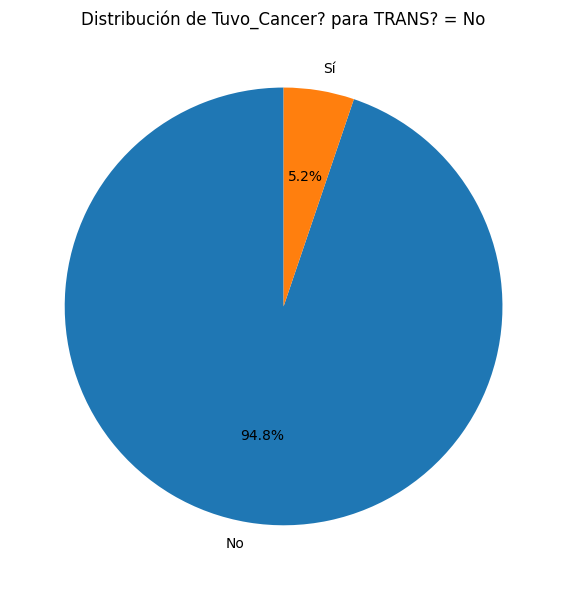

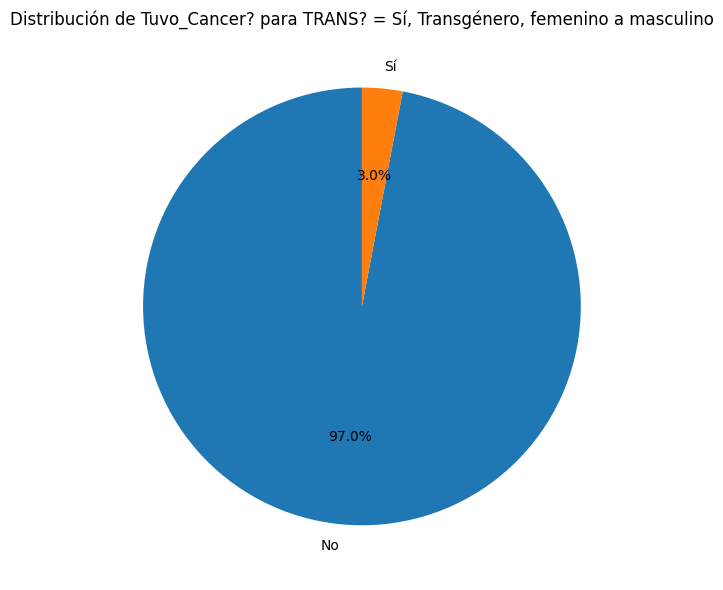

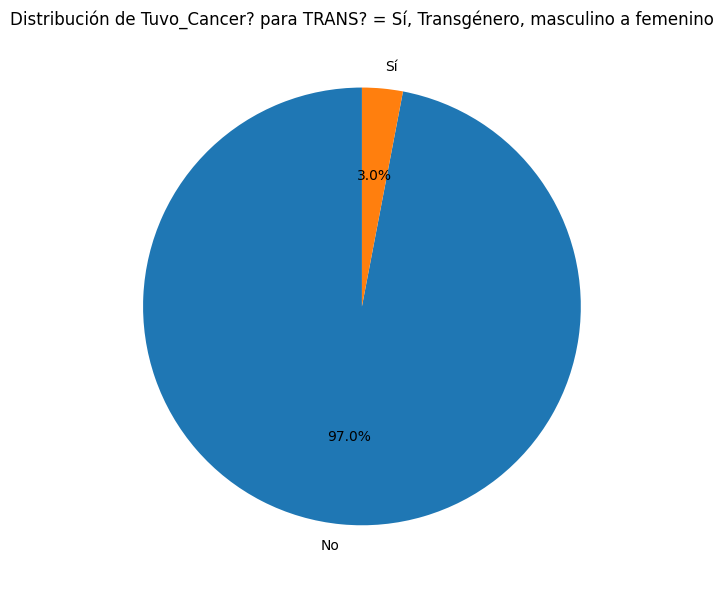

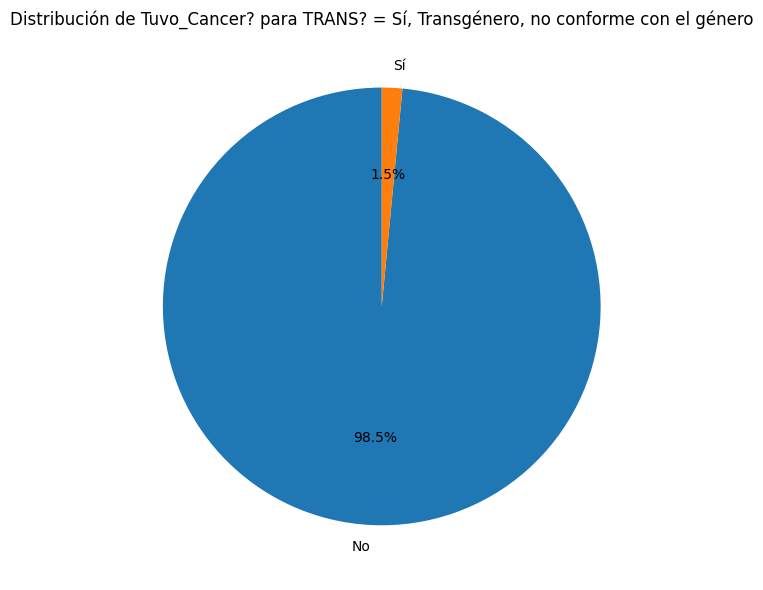

In [70]:
# Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder' en 'TRANS?'
df_filteredT = df_analisis[~df_analisis['TRANS?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]

# Agrupar el DataFrame por 'TRANS?' y 'Tuvo_Cancer?', y contar las ocurrencias
df_grouped = df_filteredT.groupby(['TRANS?', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

# Crear gráficos de tortas para cada combinación de 'Tuvo_Cancer?'
for category in df_grouped.index:
    plt.figure(figsize=(8, 6))
    df_grouped.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de Tuvo_Cancer? para TRANS? = {category}')
    plt.ylabel('')  # Ocultar la etiqueta del eje y
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
    plt.show()

Por lo menos en casos de cancer en general pareciera ser de menor proporcion en personas Trans. Depende la bibliografia es acorde pero depende el tipo de cancer. Debido a la poca cantidad de muestra, al no ser representativa no se puede utilizar como indicador.

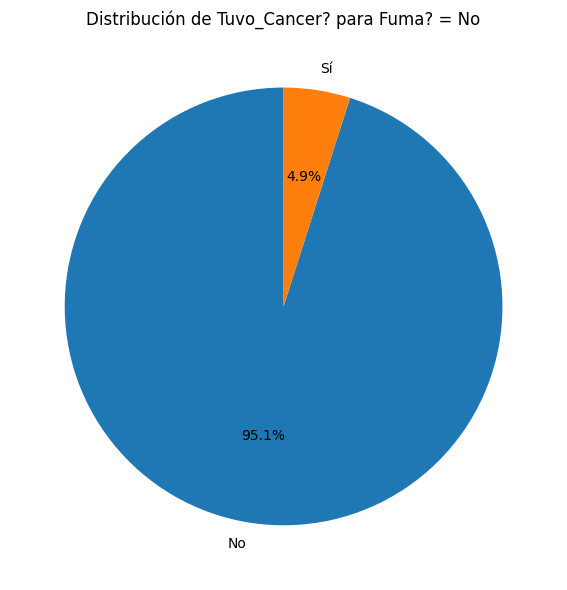

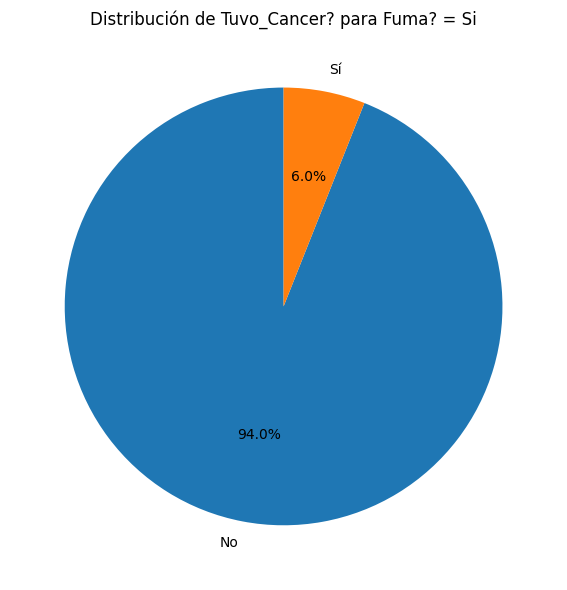

In [71]:
# Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder'
df_filteredT = df_analisis[~df_analisis['Fuma?'].isin(['No sabe', 'Se Rehusa a responder'])]

# Agrupar el DataFrame por 'TRANS?' y 'Tuvo_Cancer?', y contar las ocurrencias
df_grouped = df_filteredT.groupby(['Fuma?', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

# Crear gráficos de tortas para cada combinación de 'Tuvo_Cancer?'
for category in df_grouped.index:
    plt.figure(figsize=(8, 6))
    df_grouped.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de Tuvo_Cancer? para Fuma? = {category}')
    plt.ylabel('')  # Ocultar la etiqueta del eje y
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
    plt.show()


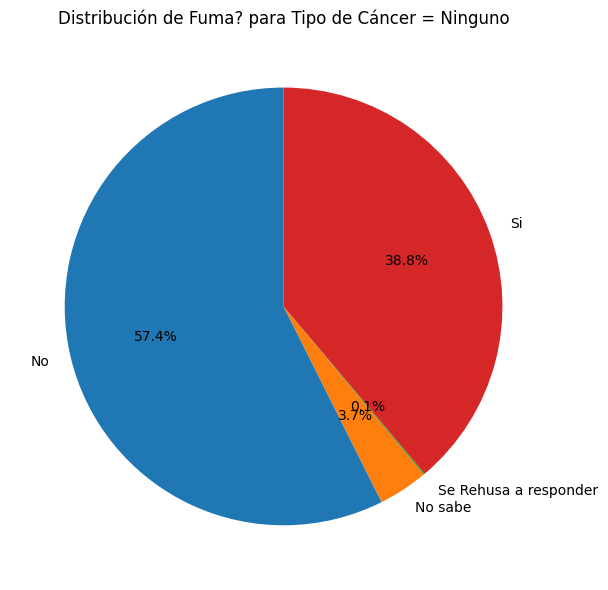

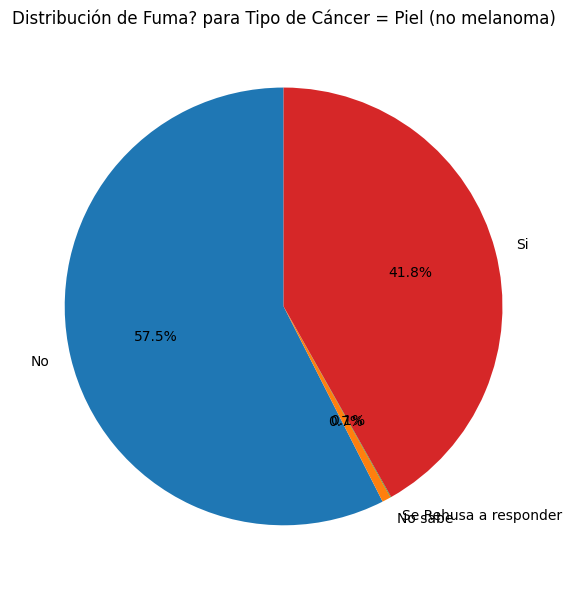

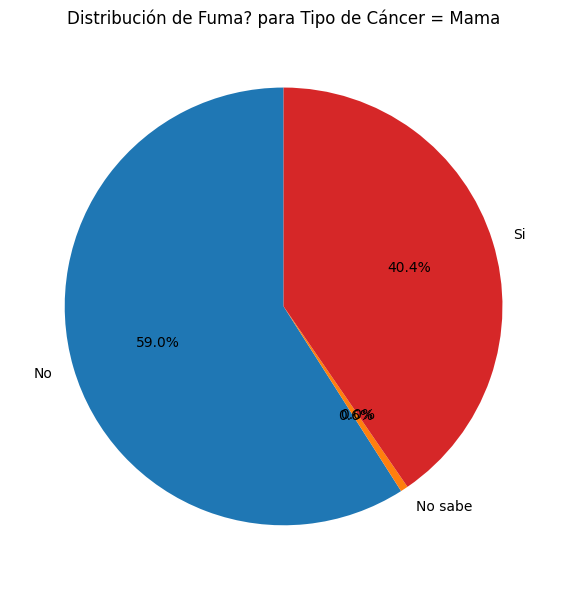

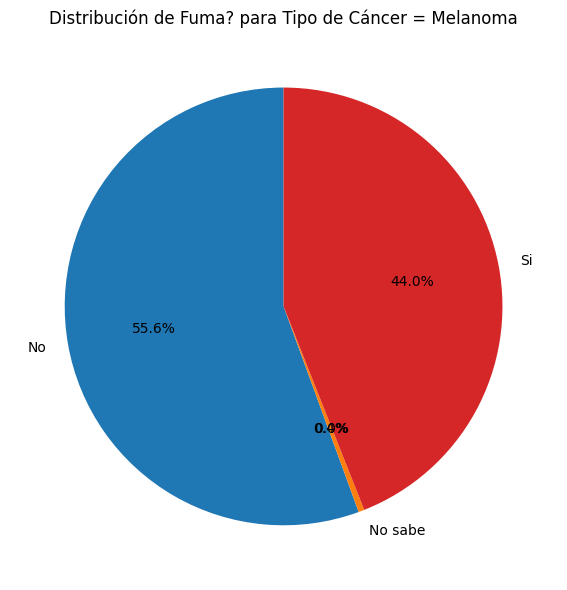

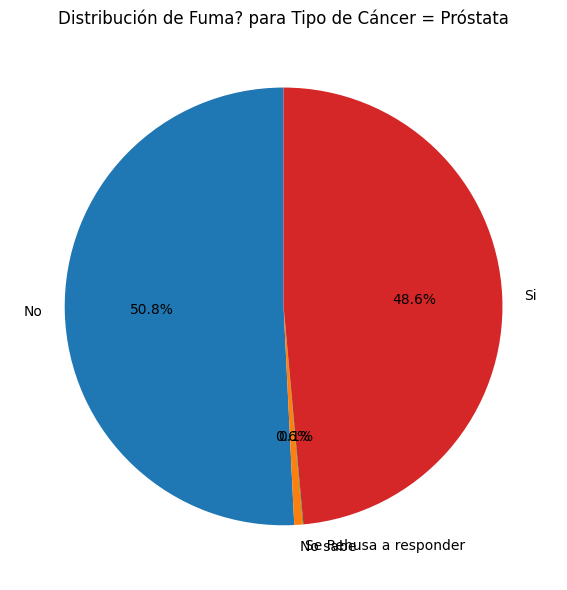

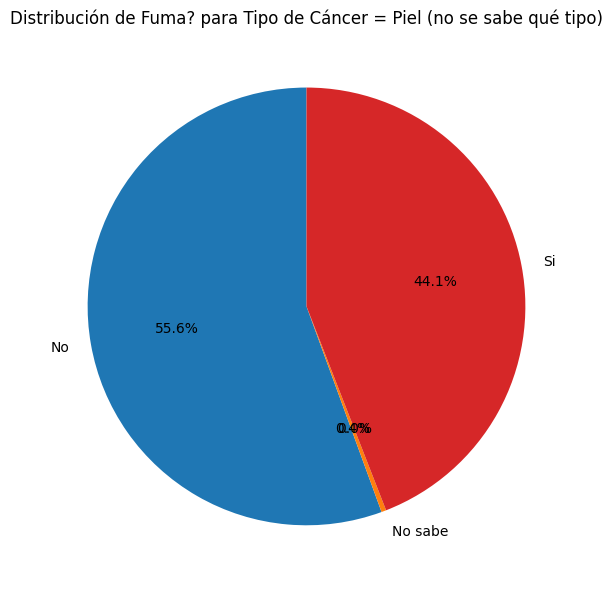

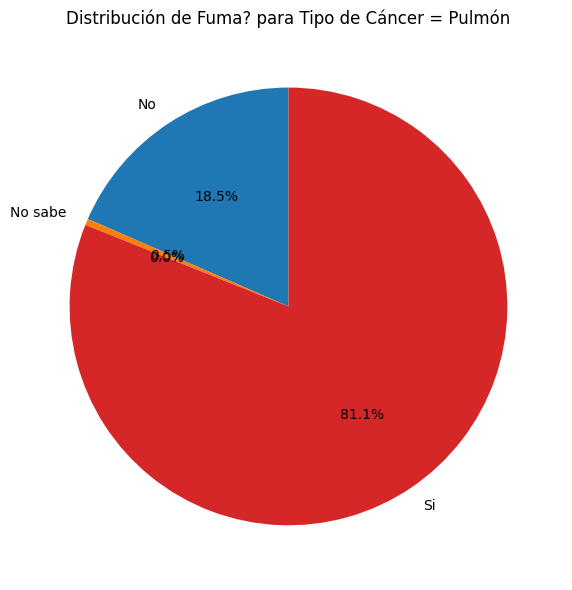

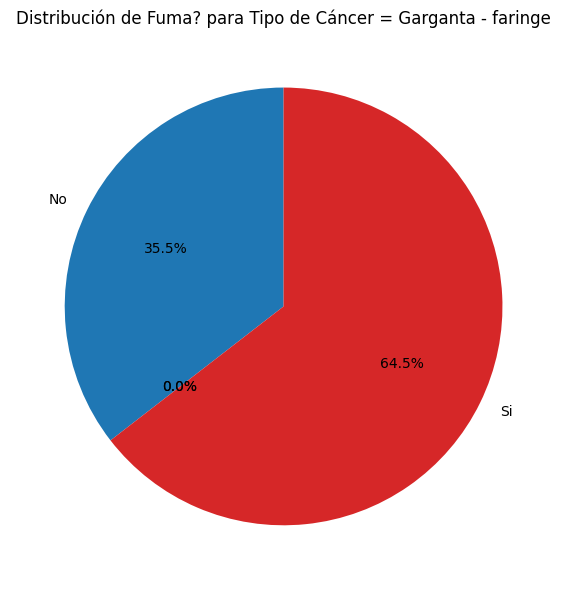

In [72]:
# Valores específicos para 'Que_tipo_de_cancer?'
valores_cancer = ['Ninguno', 'Piel (no melanoma)', 'Mama', 'Melanoma', 'Próstata', 'Piel (no se sabe qué tipo)' , 'Pulmón', 'Garganta - faringe']

# Filtrar el DataFrame para los valores específicos en 'Que_tipo_de_cancer?'
df_filtered_cancer = df_filtrado2[df_filtrado2['Que_tipo_de_cancer?'].isin(valores_cancer)]

# Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder' en 'Fuma?'
df_filteredT = df_filtered_cancer[~df_filtered_cancer['Fuma?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]

# Agrupar el DataFrame por 'Fuma?' y contar las ocurrencias para cada tipo de cáncer
df_grouped = df_filteredT.groupby(['Que_tipo_de_cancer?', 'Fuma?']).size().unstack(fill_value=0)

# Crear gráficos de tortas para cada tipo de cáncer
for cancer_type in valores_cancer:
    df_cancer_type = df_grouped.loc[cancer_type] if cancer_type in df_grouped.index else pd.Series()

    if not df_cancer_type.empty and df_cancer_type.sum() > 0:
        plt.figure(figsize=(8, 6))
        df_cancer_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribución de Fuma? para Tipo de Cáncer = {cancer_type}')
        plt.ylabel('')  # Ocultar la etiqueta del eje y
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
        plt.show()
    else:
        print(f'No hay datos para el Tipo de Cáncer = {cancer_type}')

Fumar pareciera que aumenta en general la probabilidad de cancer, pero en caso de los tipos de cancer mas especificos de personas que fuman ( 'Pulmón' y  'Garganta - faringe') la diferencia es enorme.

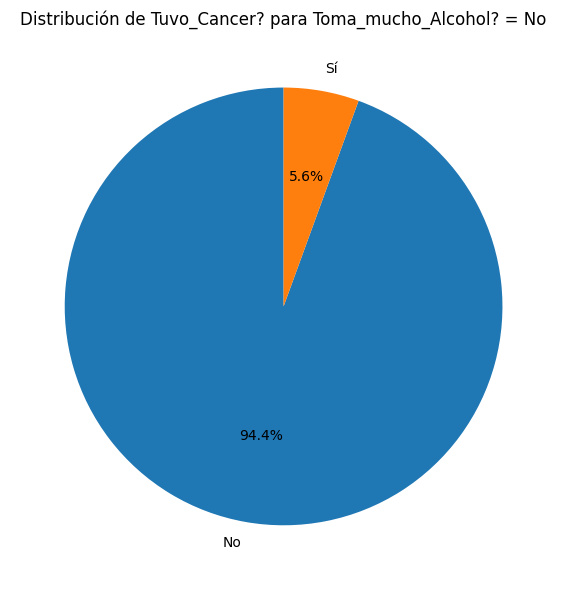

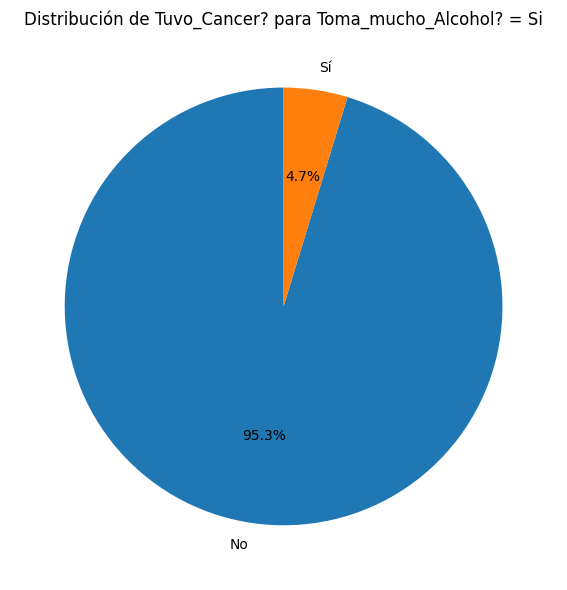

In [73]:
# Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder'
df_filteredT = df_analisis[~df_analisis['Toma_mucho_Alcohol?'].isin(['No se sabe', 'Se Rehusa a responder'])]

# Agrupar el DataFrame por 'TRANS?' y 'Tuvo_Cancer?', y contar las ocurrencias
df_grouped = df_filteredT.groupby(['Toma_mucho_Alcohol?', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

# Crear gráficos de tortas para cada combinación de 'Tuvo_Cancer?'
for category in df_grouped.index:
    plt.figure(figsize=(8, 6))
    df_grouped.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de Tuvo_Cancer? para Toma_mucho_Alcohol? = {category}')
    plt.ylabel('')  # Ocultar la etiqueta del eje y
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
    plt.show()

    #Fuma?	Toma_mucho_Alcohol?	Acitividad_Fisica?

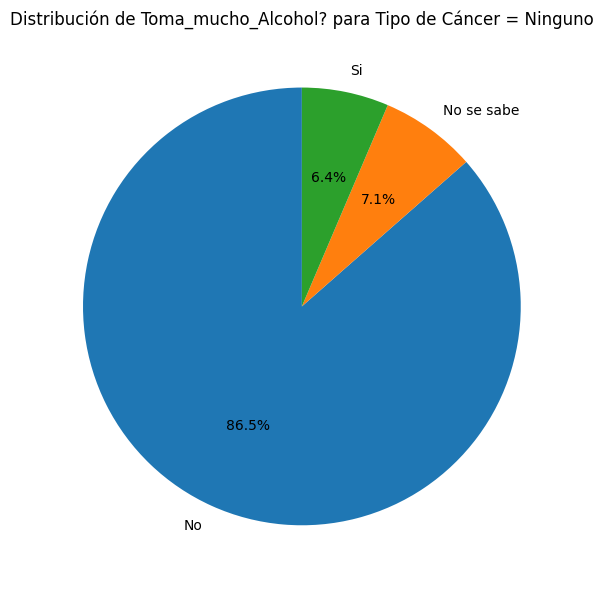

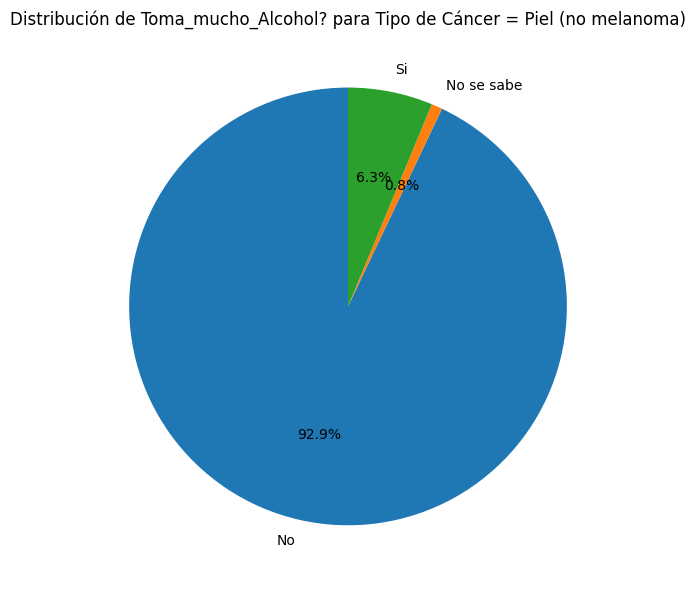

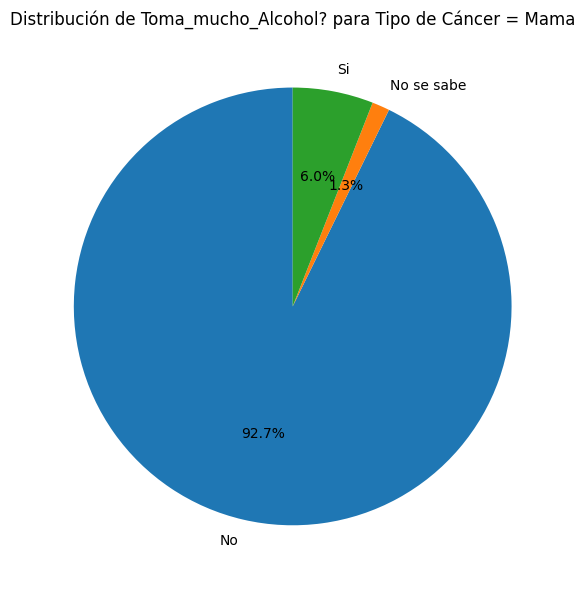

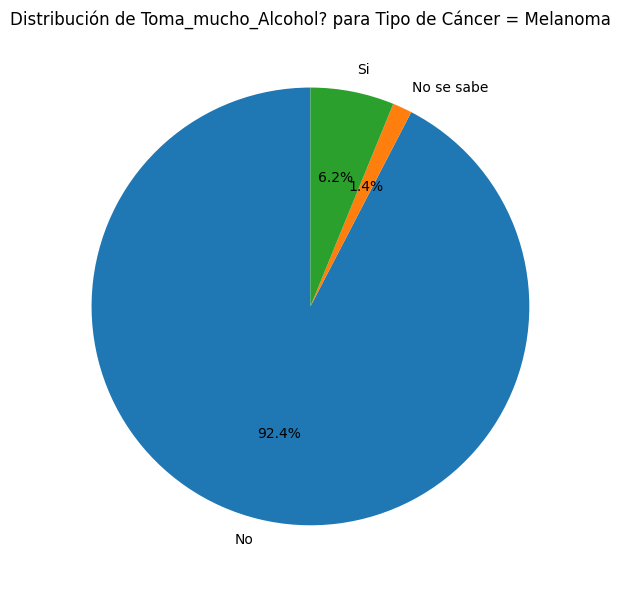

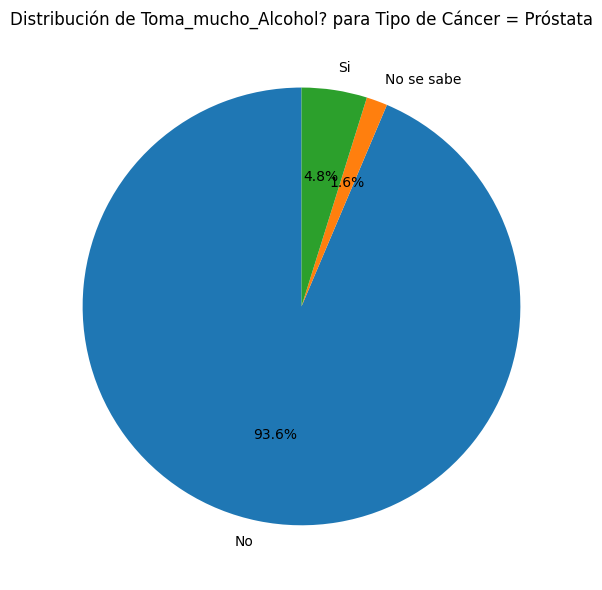

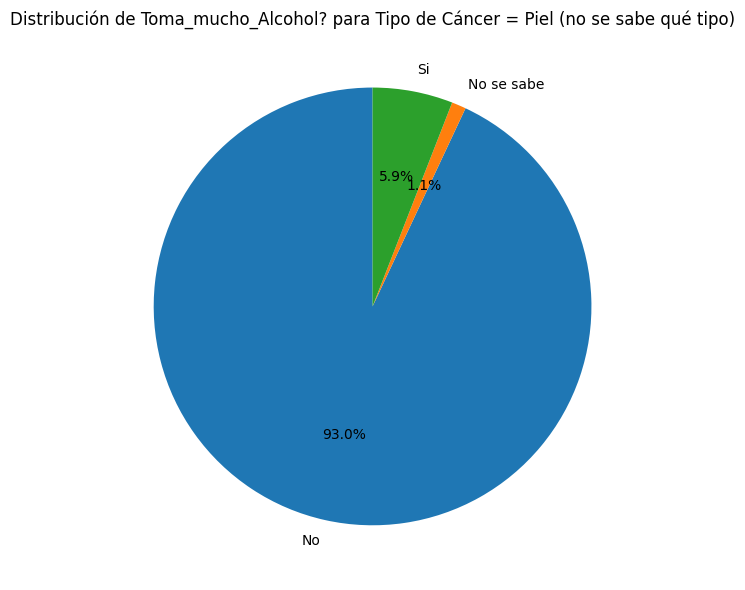

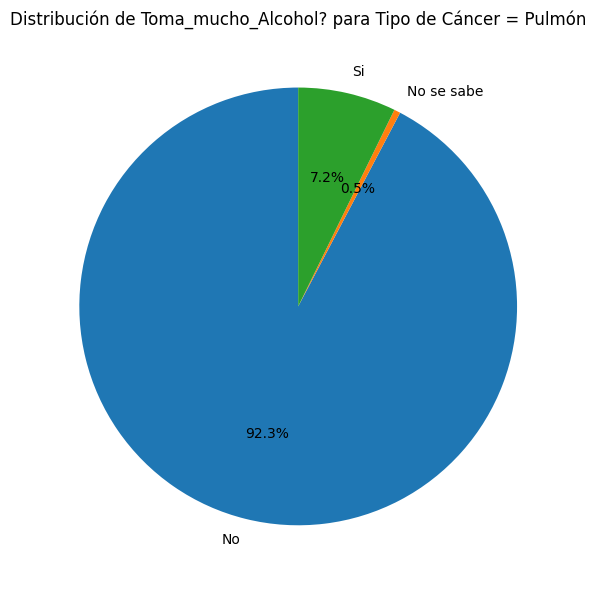

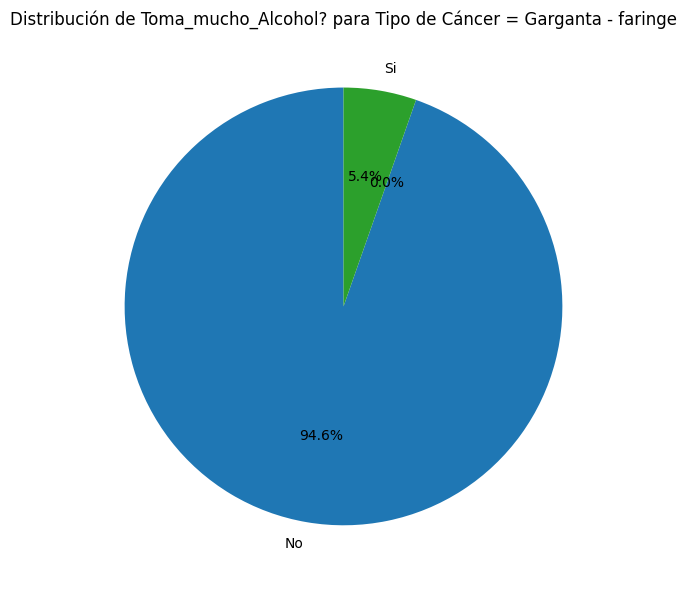

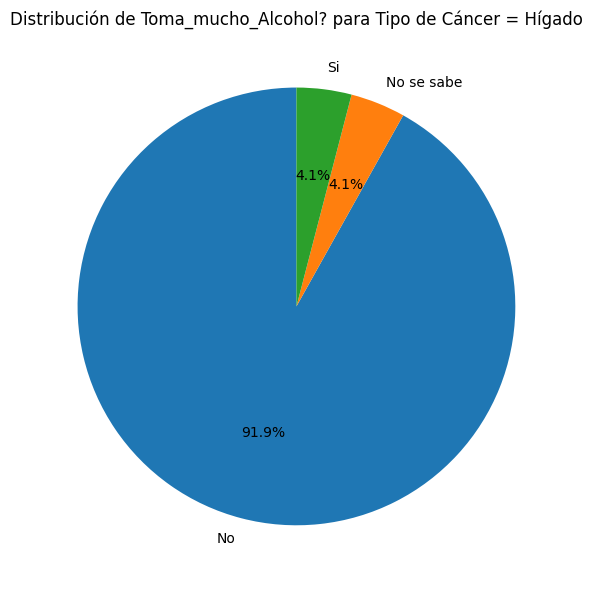

In [74]:
# Valores específicos para 'Que_tipo_de_cancer?'
valores_cancer = ['Ninguno', 'Piel (no melanoma)', 'Mama', 'Melanoma', 'Próstata', 'Piel (no se sabe qué tipo)' , 'Pulmón', 'Garganta - faringe', 'Hígado']

# Filtrar el DataFrame para los valores específicos en 'Que_tipo_de_cancer?'
df_filtered_cancer = df_filtrado2[df_filtrado2['Que_tipo_de_cancer?'].isin(valores_cancer)]

# Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder' en 'Fuma?'
df_filteredT = df_filtered_cancer[~df_filtered_cancer['Toma_mucho_Alcohol?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]

# Agrupar el DataFrame por 'Toma_mucho_Alcohol?' y contar las ocurrencias para cada tipo de cáncer
df_grouped = df_filteredT.groupby(['Que_tipo_de_cancer?', 'Toma_mucho_Alcohol?']).size().unstack(fill_value=0)

# Crear gráficos de tortas para cada tipo de cáncer
for cancer_type in valores_cancer:
    df_cancer_type = df_grouped.loc[cancer_type] if cancer_type in df_grouped.index else pd.Series()

    if not df_cancer_type.empty and df_cancer_type.sum() > 0:
        plt.figure(figsize=(8, 6))
        df_cancer_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribución de Toma_mucho_Alcohol? para Tipo de Cáncer = {cancer_type}')
        plt.ylabel('')  # Ocultar la etiqueta del eje y
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
        plt.show()
    else:
        print(f'No hay datos para el Tipo de Cáncer = {cancer_type}')

No parece que la toma de mucho alcohol tenga efecto sobre el desarrollo de cancer.

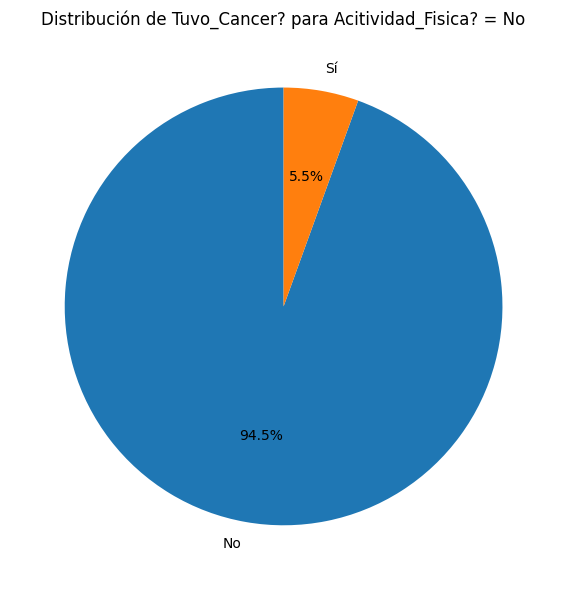

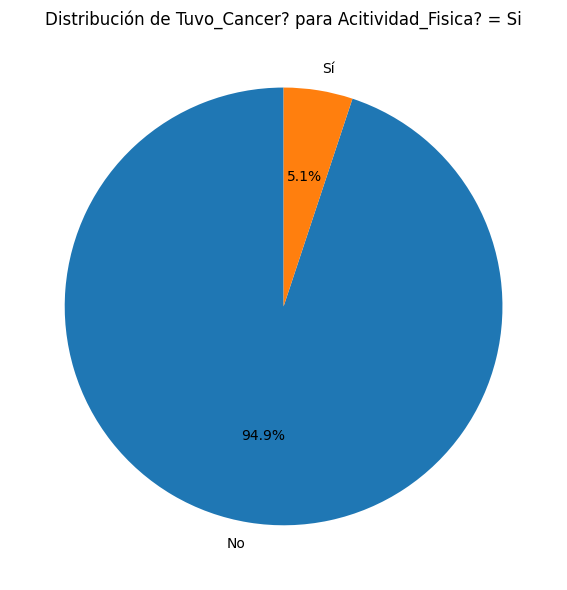

In [75]:
# Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder'
df_filteredT = df_analisis[~df_analisis['Acitividad_Fisica?'].isin(['No se sabe', 'Se Rehusa a responder'])]

# Agrupar el DataFrame por 'TRANS?' y 'Tuvo_Cancer?', y contar las ocurrencias
df_grouped = df_filteredT.groupby(['Acitividad_Fisica?', 'Tuvo_Cancer?']).size().unstack(fill_value=0)

# Crear gráficos de tortas para cada combinación de 'Tuvo_Cancer?'
for category in df_grouped.index:
    plt.figure(figsize=(8, 6))
    df_grouped.loc[category].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de Tuvo_Cancer? para Acitividad_Fisica? = {category}')
    plt.ylabel('')  # Ocultar la etiqueta del eje y
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
    plt.show()

    #Fuma?	Toma_mucho_Alcohol?	Acitividad_Fisica?

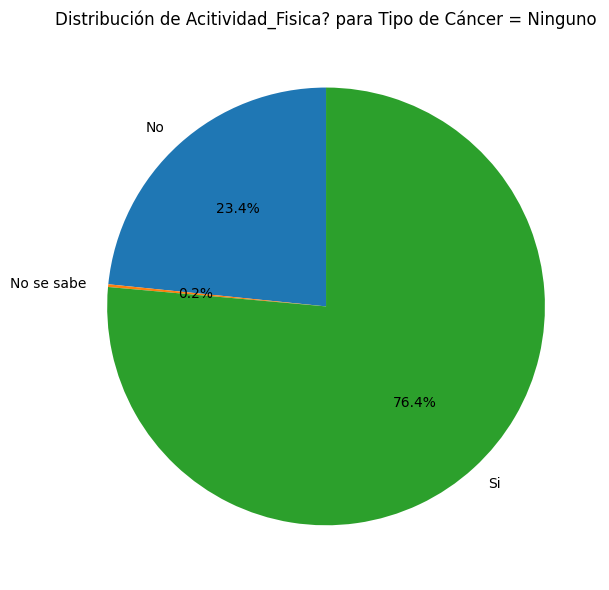

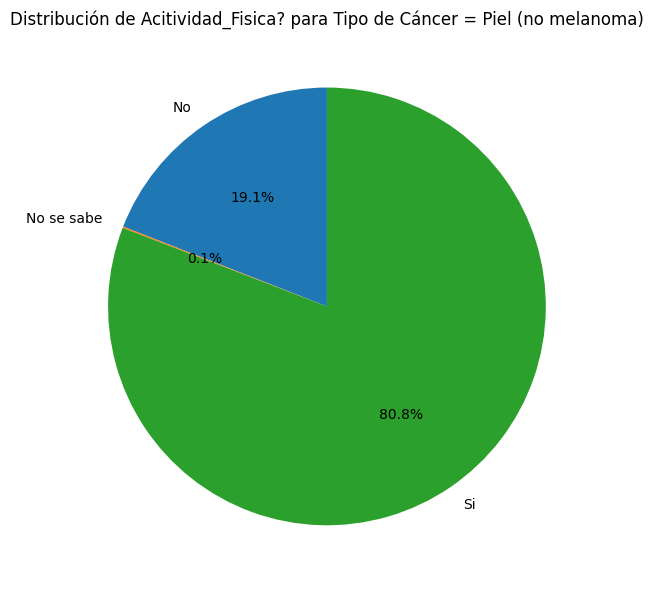

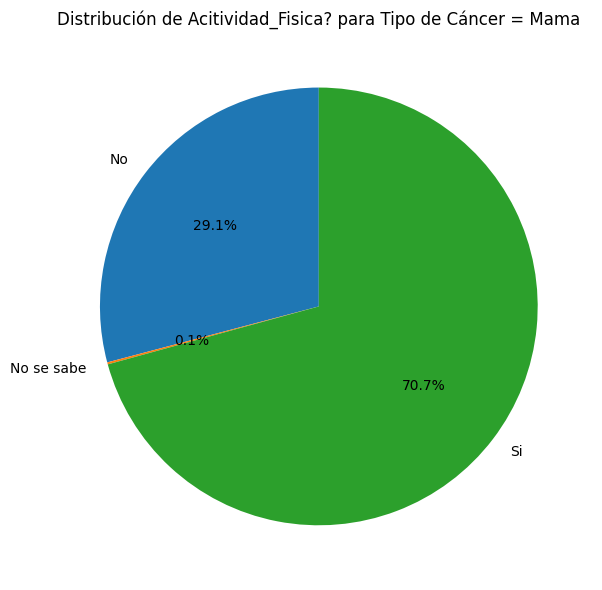

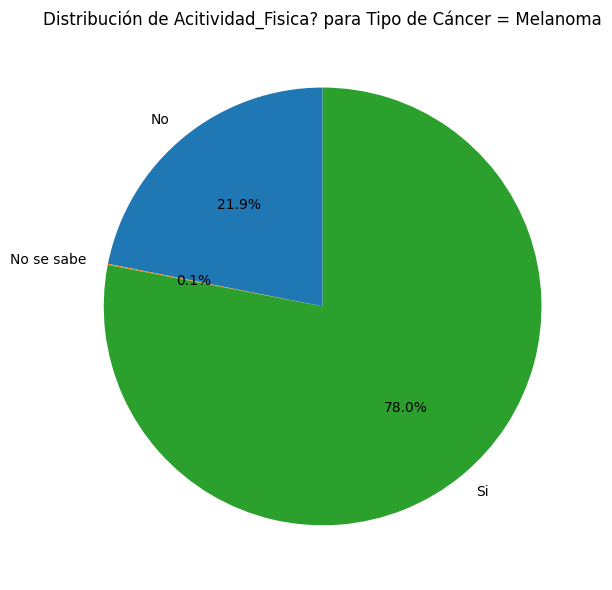

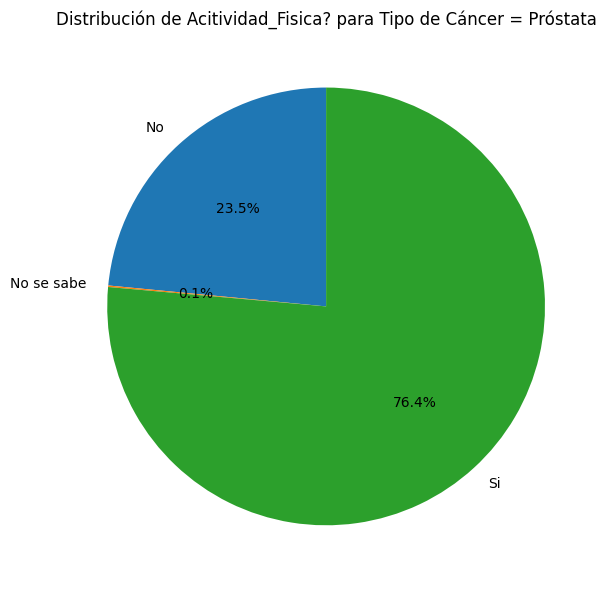

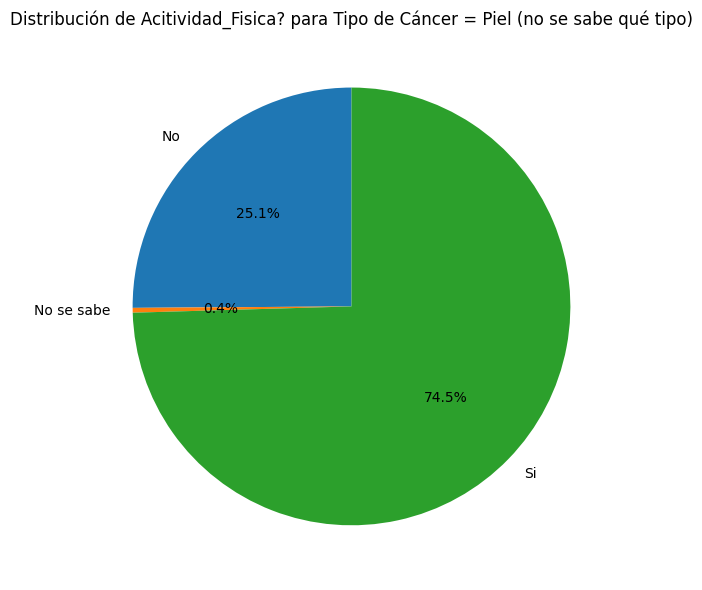

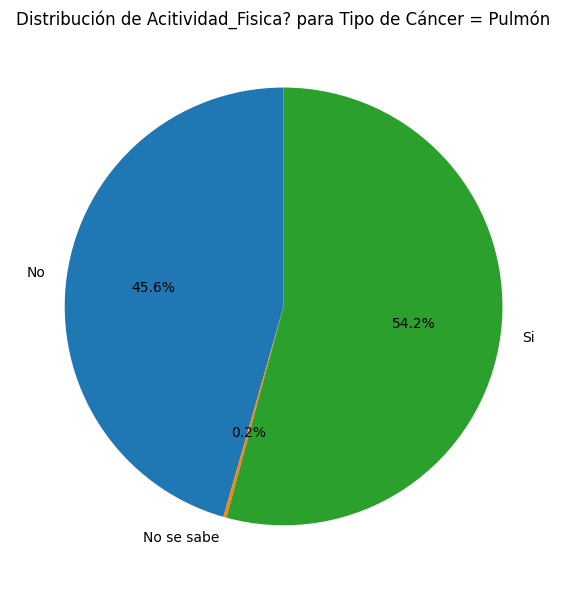

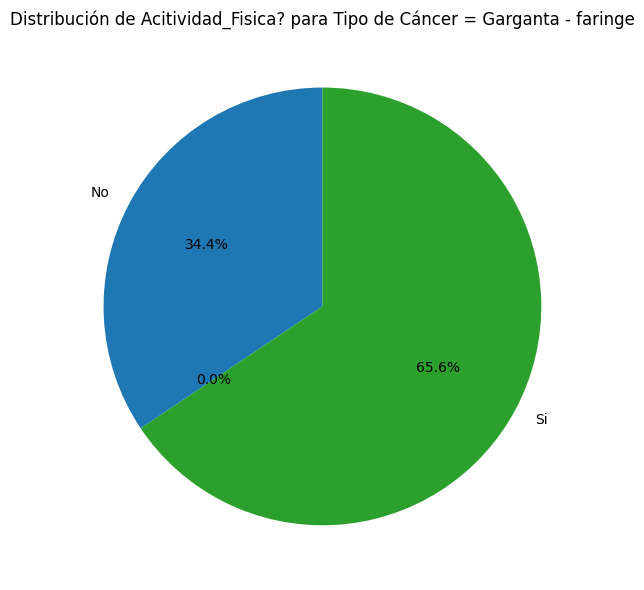

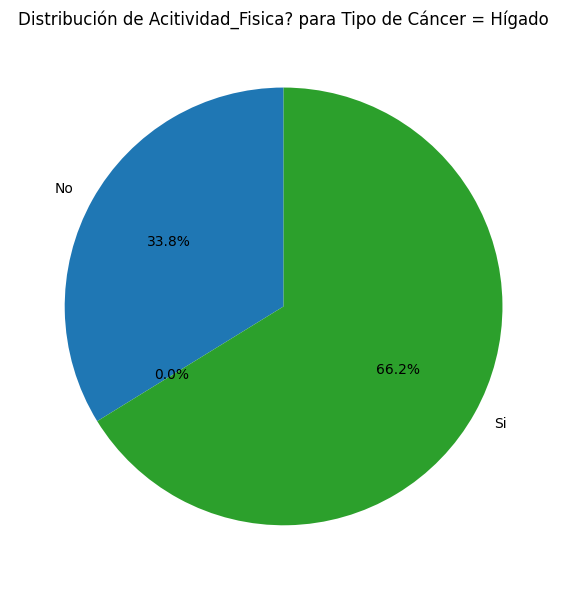

In [76]:
# Valores específicos para 'Que_tipo_de_cancer?'
valores_cancer = ['Ninguno', 'Piel (no melanoma)', 'Mama', 'Melanoma', 'Próstata', 'Piel (no se sabe qué tipo)' , 'Pulmón', 'Garganta - faringe', 'Hígado']

# Filtrar el DataFrame para los valores específicos en 'Que_tipo_de_cancer?'
df_filtered_cancer = df_filtrado2[df_filtrado2['Que_tipo_de_cancer?'].isin(valores_cancer)]

# Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder' en 'Fuma?'
df_filteredT = df_filtered_cancer[~df_filtered_cancer['Acitividad_Fisica?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]

# Agrupar el DataFrame por 'Acitividad_Fisica?' y contar las ocurrencias para cada tipo de cáncer
df_grouped = df_filteredT.groupby(['Que_tipo_de_cancer?', 'Acitividad_Fisica?']).size().unstack(fill_value=0)

# Crear gráficos de tortas para cada tipo de cáncer
for cancer_type in valores_cancer:
    df_cancer_type = df_grouped.loc[cancer_type] if cancer_type in df_grouped.index else pd.Series()

    if not df_cancer_type.empty and df_cancer_type.sum() > 0:
        plt.figure(figsize=(8, 6))
        df_cancer_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribución de Acitividad_Fisica? para Tipo de Cáncer = {cancer_type}')
        plt.ylabel('')  # Ocultar la etiqueta del eje y
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
        plt.show()
    else:
        print(f'No hay datos para el Tipo de Cáncer = {cancer_type}')

In [77]:
Según los graficos la Acitividad_Fisica pareciera disminuir la probabilidad de cancer.

SyntaxError: invalid syntax (1608585354.py, line 1)

In [ ]:
# Filtramos solo las columnas numéricas
df_numerico = df_filtrado.select_dtypes(include=[int, float])

# Calculamos la matriz de correlación
correlation_matrix = df_numerico.corr()

# Creamos el mapa de calor
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlación entre todas las variables')
plt.show()

Segun este grafico de correlaciones parece haber correlacion entre Histerectomía y el consumo de alcohol y fumar.

In [ ]:
# Combinaciones a analizar
combinaciones = [
    ('Si', 'Si'),
    ('No', 'Si'),
    ('Si', 'No'),
    ('No', 'No')]
# Crear una figura con dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Valores específicos para 'Que_tipo_de_cancer?'
tipos_cancer = ['Útero/Uterino', 'Ninguno']

for i, tipo_cancer in enumerate(tipos_cancer):
    # Filtrar el DataFrame para el valor específico en 'Que_tipo_de_cancer?'
    df_filtered = df_filtrado2[df_filtrado2['Que_tipo_de_cancer?'] == tipo_cancer]

    # Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder' en 'Fuma?' y 'Toma_mucho_Alcohol?'
    df_filtered = df_filtered[~df_filtered['Fuma?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]
    df_filtered = df_filtered[~df_filtered['Toma_mucho_Alcohol?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]

    # Contar las ocurrencias para las combinaciones deseadas
    conteo_combinaciones = []
    for toma_alcohol, fuma in combinaciones:
        count = df_filtered[
            (df_filtered['Toma_mucho_Alcohol?'] == toma_alcohol) &
            (df_filtered['Fuma?'] == fuma)
        ].shape[0]
        conteo_combinaciones.append(count)

    # Crear el gráfico de torta
    axs[i].pie(conteo_combinaciones,
              labels=[f'Toma={toma_alcohol}, Fuma={fuma}' for toma_alcohol, fuma in combinaciones],
              autopct='%1.1f%%', startangle=90,
              colors=plt.cm.Paired(range(len(combinaciones))))
    axs[i].set_title(f'Distribución de Combinaciones para Tipo de Cáncer = {tipo_cancer}')

plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien
plt.show()

Pareciera que no hay un cambio apreciable en el cancer de Útero respecto a si toma y/o fuma o no lo hace, pero si filtramos solo para cuando el sexo es el femenino, lo cual deberia ser la unica forma de que haya este tipo de cancer, podemos observar:

In [ ]:

# Crear una función para generar gráficos de torta
def plot_pie_chart(df, tipo_cancer, title):
    # Filtrar el DataFrame para el valor específico en 'Que_tipo_de_cancer?'
    df_filtered = df[df['Que_tipo_de_cancer?'] == tipo_cancer]

    # Filtrar el DataFrame para el valor específico en 'Sexo'
    df_filtered = df_filtered[df_filtered['Sexo'] == 'Femenino']

    # Filtrar el DataFrame para excluir los valores 'No sabe/No está seguro' y 'Se rehúsa a responder' en 'Fuma?' y 'Toma_mucho_Alcohol?'
    df_filtered = df_filtered[~df_filtered['Fuma?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]
    df_filtered = df_filtered[~df_filtered['Toma_mucho_Alcohol?'].isin(['No sabe/No está seguro', 'Se rehúsa a responder'])]

    # Contar las ocurrencias para las combinaciones deseadas
    combinaciones = [
        ('Si', 'Si'),
        ('No', 'Si'),
        ('Si', 'No'),
        ('No', 'No')
    ]

    conteo_combinaciones = []
    for toma_alcohol, fuma in combinaciones:
        count = df_filtered[
            (df_filtered['Toma_mucho_Alcohol?'] == toma_alcohol) &
            (df_filtered['Fuma?'] == fuma)
        ].shape[0]
        conteo_combinaciones.append(count)

    # Crear el gráfico de torta
    plt.figure(figsize=(8, 6))
    plt.pie(conteo_combinaciones, labels=[f'Toma={toma_alcohol}, Fuma={fuma}' for toma_alcohol, fuma in combinaciones],
            autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(combinaciones))))
    plt.title(title)
    plt.tight_layout()  # Ajustar el diseño para que todo se muestre bien

    # Mostrar el gráfico
    plt.show()

# Valor específico para 'Que_tipo_de_cancer?' = 'Útero/Uterino'
plot_pie_chart(df_filtrado2, 'Útero/Uterino',
               'Distribución de Combinaciones de Toma_mucho_Alcohol? y Fuma? para Tipo de Cáncer = Útero/Uterino')

# Valor específico para 'Que_tipo_de_cancer?' = 'Ninguno'
plot_pie_chart(df_filtrado2, 'Ninguno',
               'Distribución de Combinaciones de Toma_mucho_Alcohol? y Fuma? para Tipo de Cáncer = Ninguno')


Mayor porcentaje de personas que si fuman.

# Conclusión (Momentanea)

Algunas de las variables podrían utilizarse para un modelo predictivo.

# Onehot Encoding (En preparación)

In [ ]:
# Lista de columnas para realizar one hot encoding
columnas_a_codificar = ['Fuma?', 'Toma_mucho_Alcohol?', 'Acitividad_Fisica?',
                        'Edad', 'TRANS?', 'Cancer de piel diferente a melanoma',
                        'Melanoma u otro cancer', 'histerectomía?',
                        'Cuantos_tipos_de_cancer_tuvo?', 'Que_tipo_de_cancer?',
                        'Sexo', 'Estado_físico_no_bueno_ultimo_tiempo',
                        'Estado_mental_no_bueno_ultimo_tiempo']

# Realizar one hot encoding
df_onehot = pd.get_dummies(df_filtrado2, columns=columnas_a_codificar)

# Renombrar las columnas para que solo cambie el último "_" por ">"
df_onehot.columns = [
    col[::-1].replace('_', '>', 1)[::-1] if any(col.startswith(c) for c in columnas_a_codificar) else col
    for col in df_onehot.columns
]

# Convertir True/False a 1/0
df_onehot = df_onehot.astype(int)

# Mostrar el resultado
df_onehot

In [ ]:
#Columnas en df_onehot
df_onehot.columns

Hay muchas columnas para analisar, pero no tiene sentido analizar resultados como No sabe/ No esta seguro

In [ ]:
# Columnas a excluir
columnas_a_excluir = ['Fuma?>No sabe','Fuma?>Se Rehusa a responder', 'Toma_mucho_Alcohol?>No se sabe',
       'Acitividad_Fisica?>No se sabe','Edad>Desconocido',
       'TRANS?>No sabe/No está seguro', 'TRANS?>Se rehúsa a responder',
       'Cancer de piel diferente a melanoma>No sabe / No está seguro',
       'Cancer de piel diferente a melanoma>Se rehúsa a responder',
       'Melanoma u otro cancer>No sabe / No está seguro',
       'Melanoma u otro cancer>Se rehúsa a responder',
       'histerectomía?>No sabe/No está seguro',
       'histerectomía?>Se rehúsa a responder',
       'Cuantos_tipos_de_cancer_tuvo?>No sabe',
       'Cuantos_tipos_de_cancer_tuvo?>Se rehúsa a responder',
       'Que_tipo_de_cancer?>Se rehúsa a responder',
       'Estado_físico_no_bueno_ultimo_tiempo>No sabe/Se rehúsa/Faltante',
       'Estado_mental_no_bueno_ultimo_tiempo>No sabe/Se rehúsa/Faltante']

# Filtrar las columnas de df_onehot excluyendo las mencionadas
df_onehot_filtrado = df_onehot.drop(columns=columnas_a_excluir)

# Mostrar el resultado
df_onehot_filtrado

In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = df_onehot_filtrado.corr()

# Creamos el mapa de calor
plt.figure(figsize=(70, 70))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlación entre todas las variables')
plt.show()

In [ ]:
df_histerectomia = df_onehot_filtrado[df_onehot_filtrado['histerectomía?>Sí'] == 1]
df_histerectomia

In [ ]:
# Crear una figura y un conjunto de subgráficas
fig, axes = plt.subplots(nrows=len(df_histerectomia.columns), ncols=1, figsize=(10, len(df_histerectomia.columns) * 4))

# Iterar sobre cada columna en el DataFrame
for ax, column in zip(axes, df_histerectomia.columns):
    # Contar las ocurrencias de cada valor en la columna
    conteo = df_histerectomia[column].value_counts()

    # Graficar el conteo de valores como un gráfico de barras
    conteo.plot(kind='bar', ax=ax)
    ax.set_title(f'Conteo de {column}')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Número de Ocurrencias')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño para que no se superpongan las etiquetas
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear una figura con subgráficas
fig = make_subplots(rows=len(df_histerectomia.columns), cols=1, subplot_titles=df_histerectomia.columns)

# Iterar sobre cada columna en el DataFrame
for i, column in enumerate(df_histerectomia.columns, start=1):
    # Contar las ocurrencias de cada valor en la columna
    conteo = df_histerectomia[column].value_counts()

    # Crear un gráfico de barras
    bar = go.Bar(
        x=conteo.index,
        y=conteo.values,
        name=column
    )

    # Añadir el gráfico de barras a la subgráfica
    fig.add_trace(bar, row=i, col=1)

# Actualizar el diseño del gráfico
fig.update_layout(
    height=400 + len(df_histerectomia.columns) * 300,
    title_text='Conteo de Valores por Columna',
    showlegend=False,
    xaxis_title='Valor',
    yaxis_title='Número de Ocurrencias',
    xaxis=dict(tickangle=-45)
)

# Mostrar el gráfico
fig.show()


In [ ]:
# Crear un scatter plot para visualizar la correlación
fig = px.scatter(
    df_numerico,
    x='HADHYST2>histerectomía?',
    y='SMOKE100>Fuma?',
    title='Correlación entre HADHYST2>histerectomía? y SMOKE100>Fuma?',
    labels={'HADHYST2>histerectomía?': 'HADHYST2>histerectomía?', 'SMOKE100>Fuma?': 'SMOKE100>Fuma?'},
    trendline='ols'  # Agregar una línea de tendencia
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Suponiendo que df_onehot_filtrado ya está cargado
columns = df_onehot_filtrado.columns
x_column = 'IMC'

for column in columns:
    if column != x_column:  # Excluir la columna 'IMC' del eje y
        if df_onehot_filtrado[column].dtype == 'object':  # Verificar si la columna contiene texto
            plt.figure(figsize=(8, 6))
            df_onehot_filtrado[column].value_counts().plot(kind='bar')
            plt.title(f'Frecuencia de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.grid(True)
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            plt.scatter(df_onehot_filtrado[x_column], df_onehot_filtrado[column])
            plt.title(f'IMC vs {column}')
            plt.xlabel('IMC')
            plt.ylabel(column)
            plt.grid(True)
            plt.show()
